## Noticias por día

In [8]:
import pandas as pd

# Leer el archivo CSV original
df = pd.read_csv('noticias_primicias_32180_2024-02-01.csv')

# Separar la columna 'Fecha_Publicacion' en dos columnas 'Fecha' y 'Hora'
df[['Fecha', 'Hora']] = df['Fecha_Publicacion'].str.split(' - ', expand=True)

# Diccionario para convertir los meses de español a inglés
meses_es_en = {
    'Ene': 'Jan', 'Feb': 'Feb', 'Mar': 'Mar', 'Abr': 'Apr', 'May': 'May', 'Jun': 'Jun',
    'Jul': 'Jul', 'Ago': 'Aug', 'Sep': 'Sep', 'Oct': 'Oct', 'Nov': 'Nov', 'Dic': 'Dec'
}

# Función para reemplazar los nombres de los meses
def reemplazar_mes(fecha):
    if pd.isna(fecha):
        return fecha
    for mes_es, mes_en in meses_es_en.items():
        if mes_es in fecha:
            return fecha.replace(mes_es, mes_en)
    return fecha

# Asegurarnos de que la columna 'Fecha' es de tipo str
df['Fecha'] = df['Fecha'].astype(str)

# Aplicar la función de reemplazo a la columna 'Fecha'
df['Fecha'] = df['Fecha'].apply(reemplazar_mes)

# Convertir la columna 'Fecha' a tipo datetime para asegurar el formato adecuado
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d %b %Y', errors='coerce')

# Guardar el DataFrame con las nuevas columnas en un nuevo CSV
df.to_csv('noticias_separadas.csv', index=False, date_format='%Y-%m-%d')

# Crear columnas adicionales para año, mes y día
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day

# Contar la cantidad de noticias por cada año, mes y día
conteo_por_dia = df.groupby(['Año', 'Mes', 'Día']).size().reset_index(name='Cantidad_Noticias')

# Ordenar el conteo por año, mes y día
conteo_por_dia = conteo_por_dia.sort_values(by=['Año', 'Mes', 'Día'])

# Guardar el conteo de noticias por día en un nuevo CSV
conteo_por_dia.to_csv('conteo_noticias_por_dia.csv', index=False)

print("Procesamiento completado. Archivos 'noticias_separadas.csv' y 'conteo_noticias_por_dia.csv' creados.")


Procesamiento completado. Archivos 'noticias_separadas.csv' y 'conteo_noticias_por_dia.csv' creados.


## Gráficas

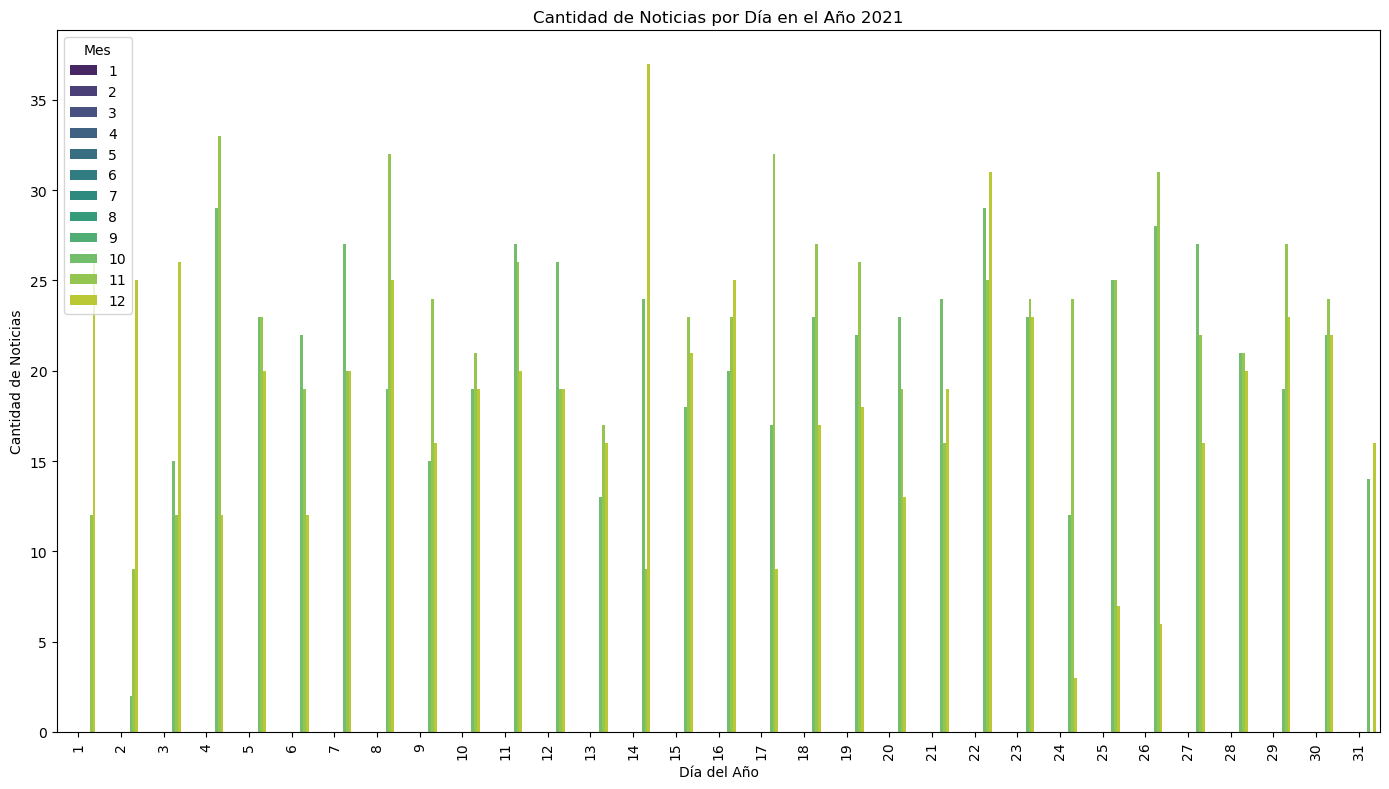

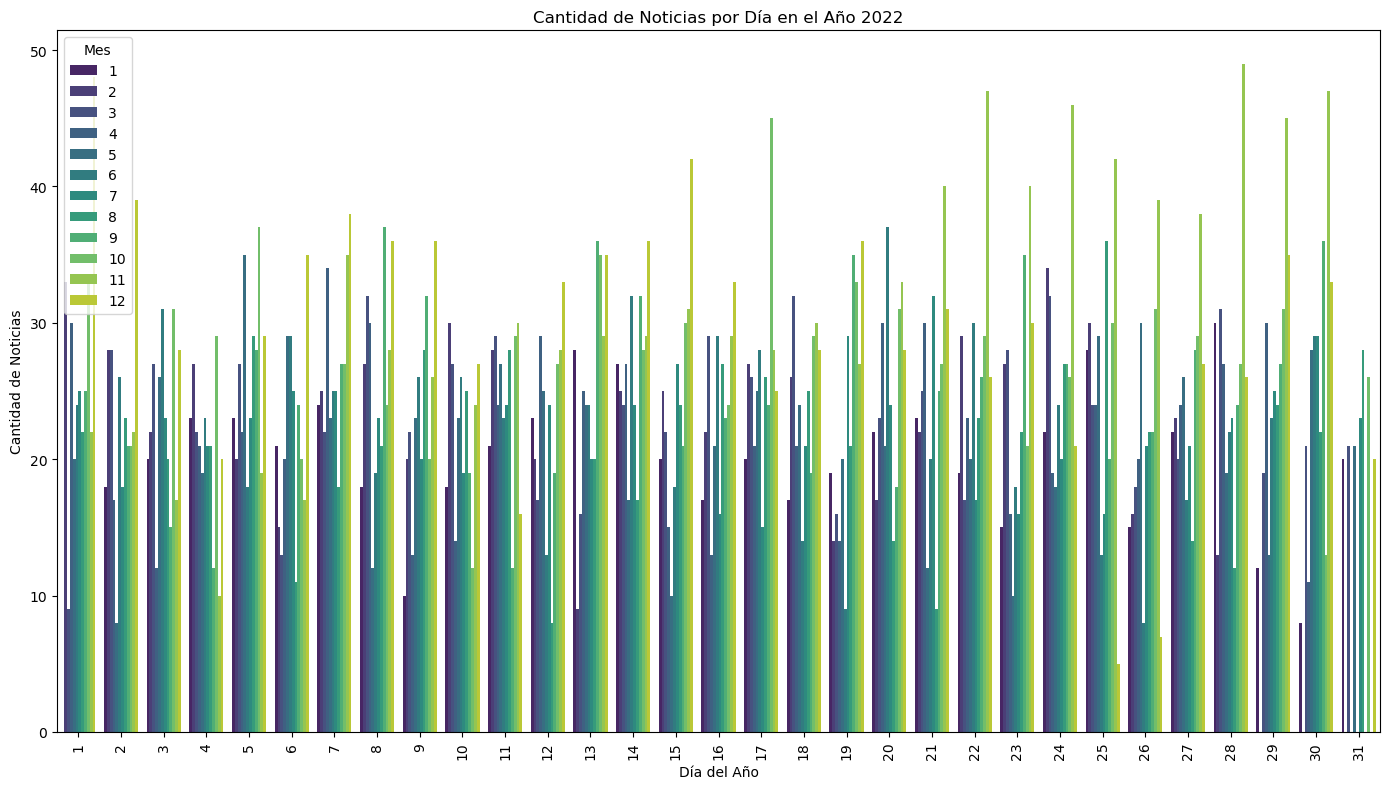

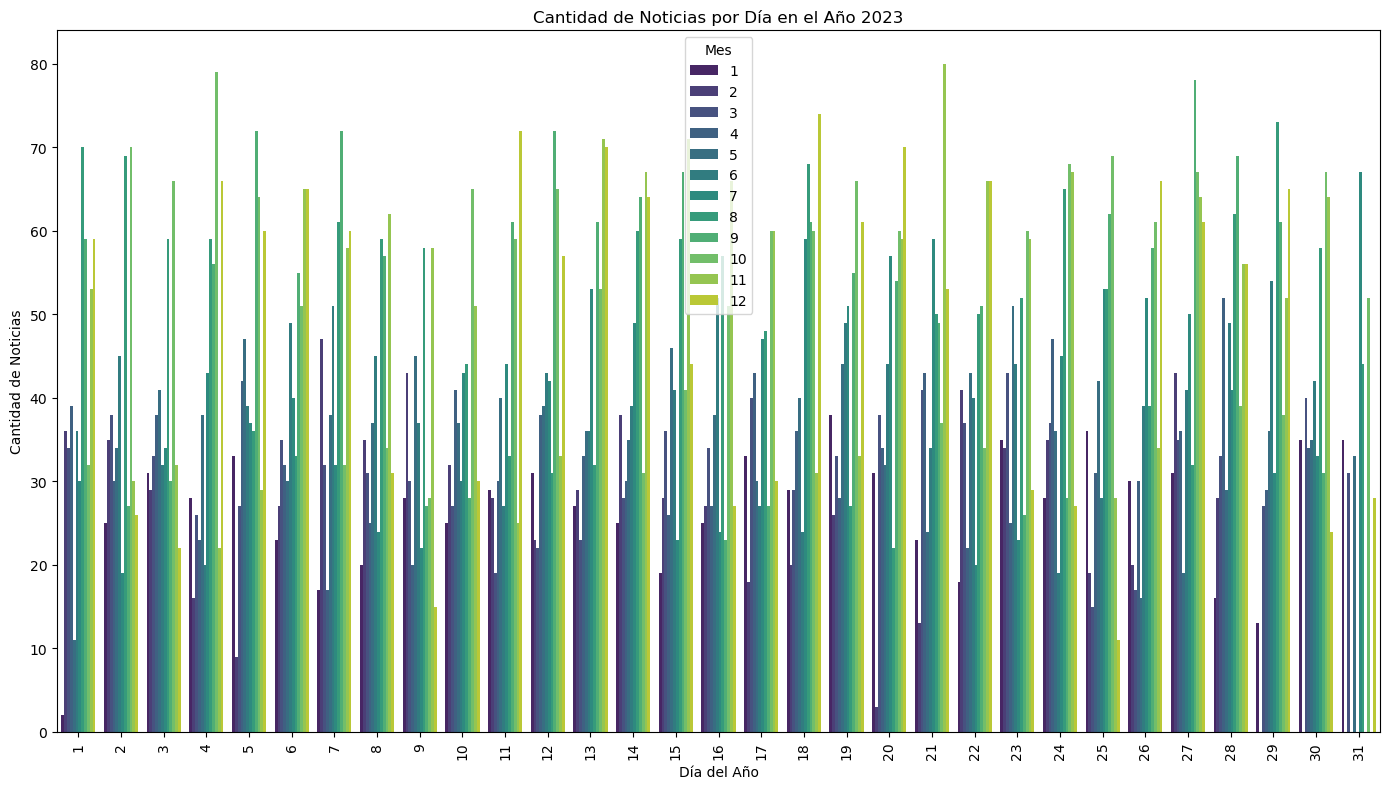

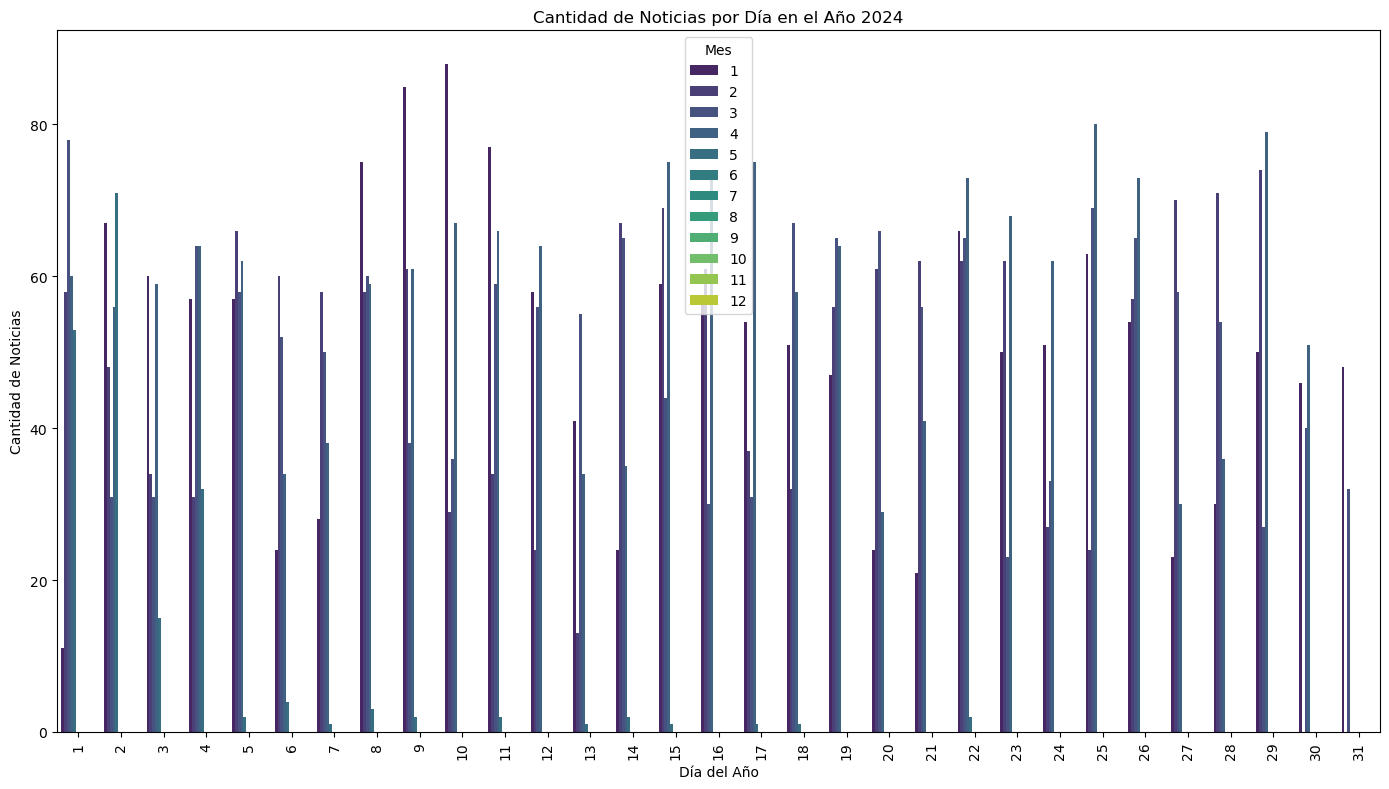

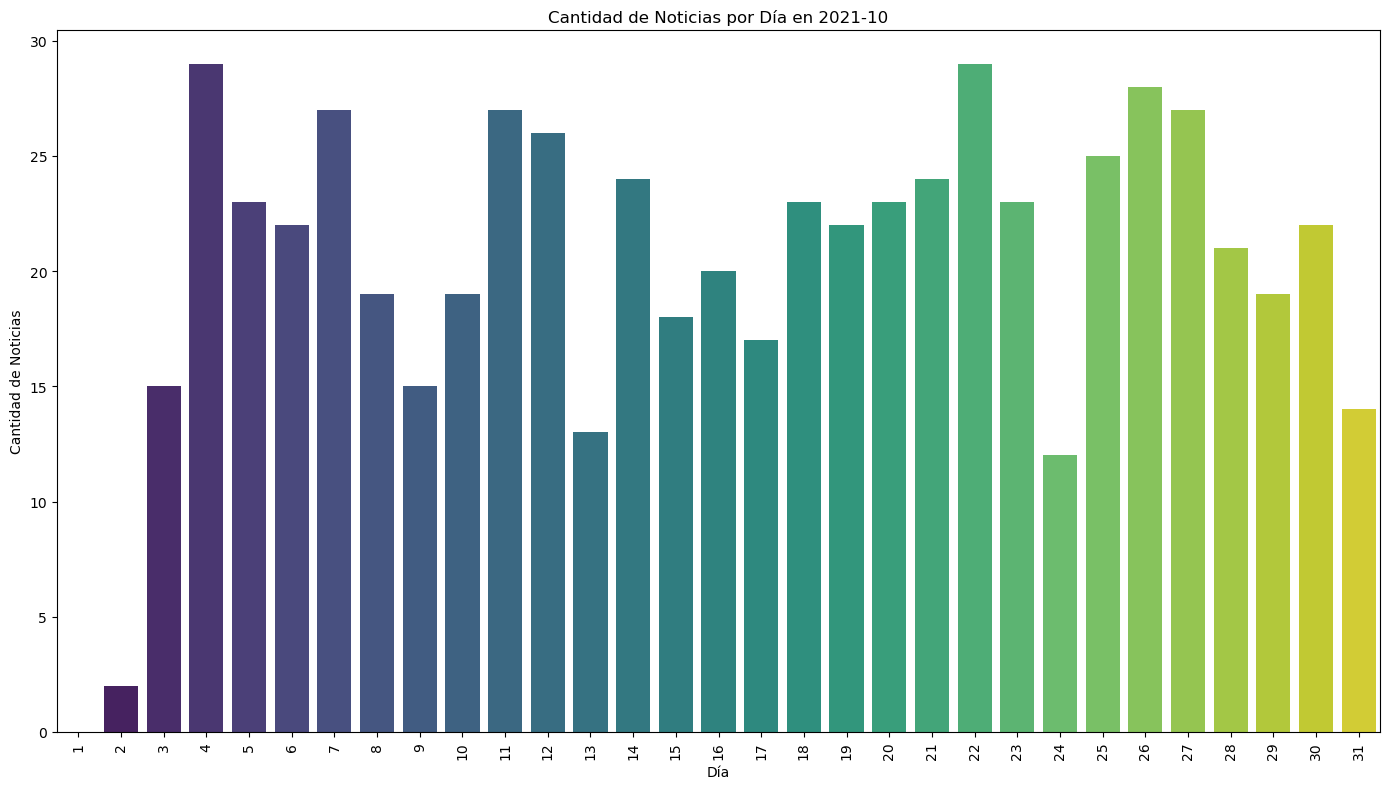

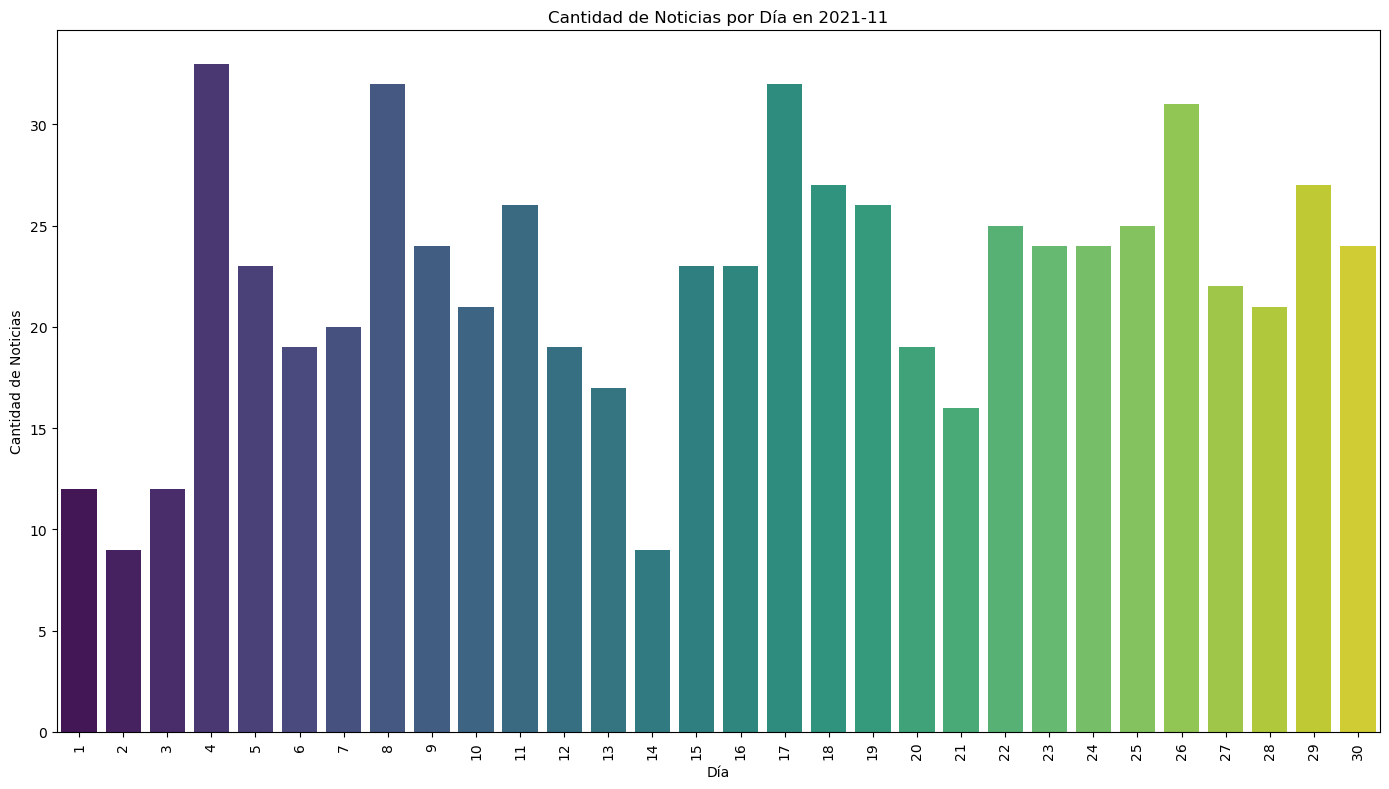

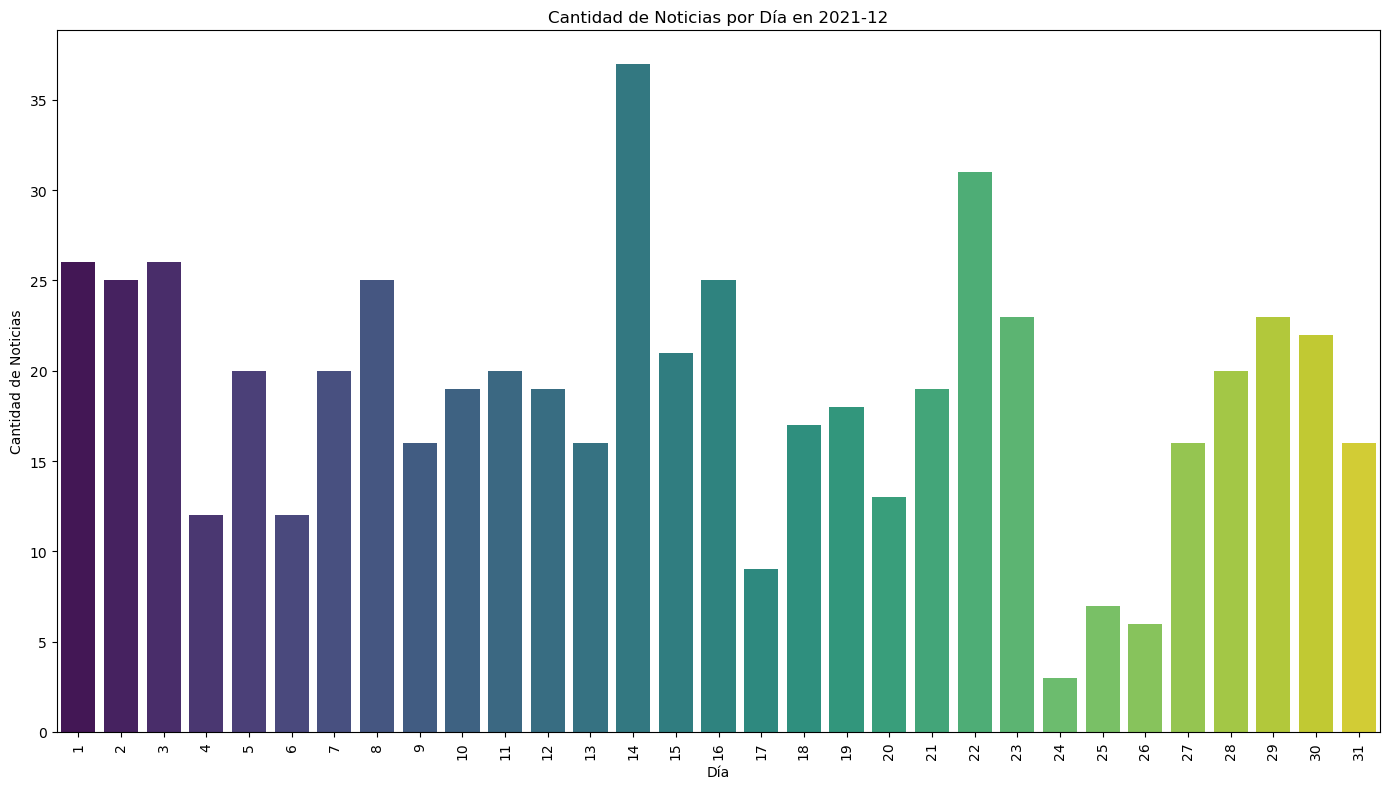

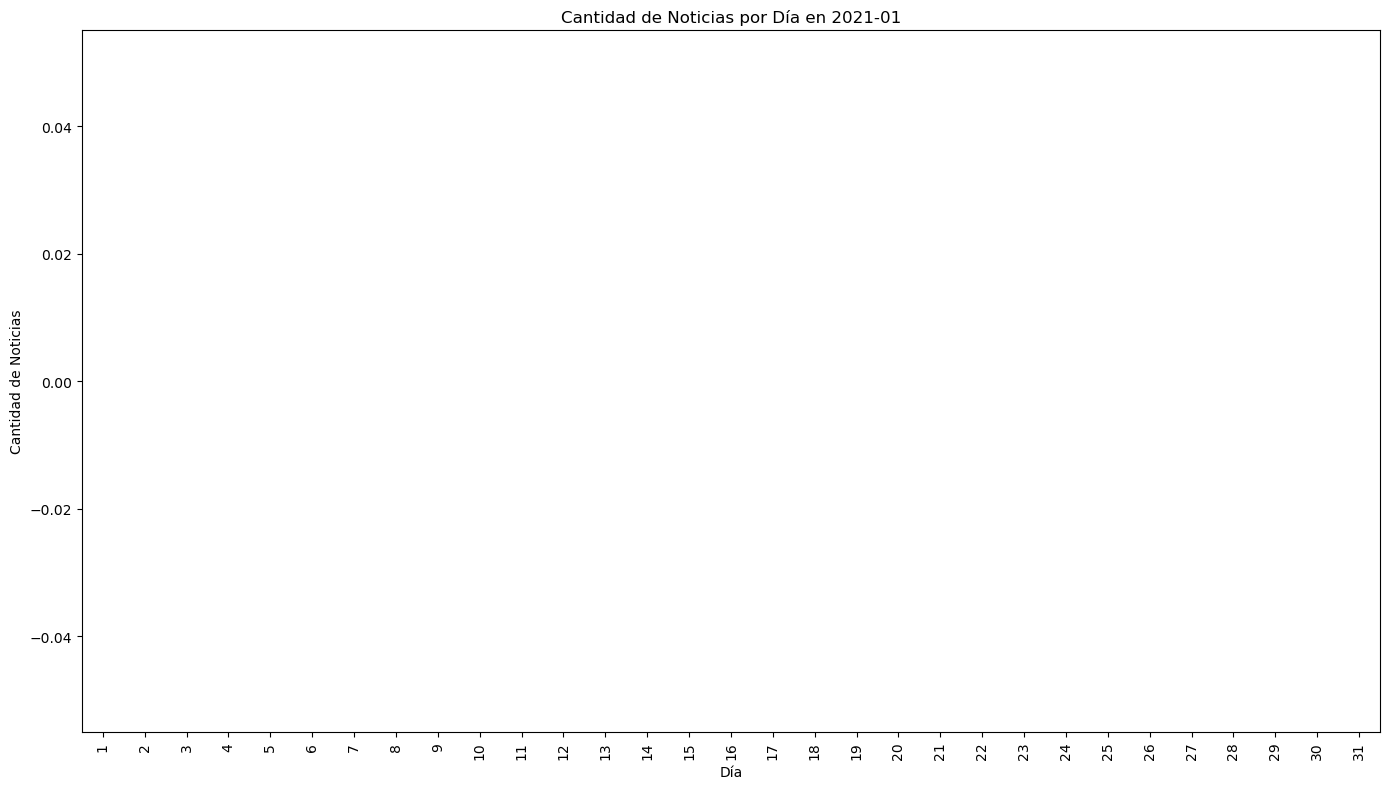

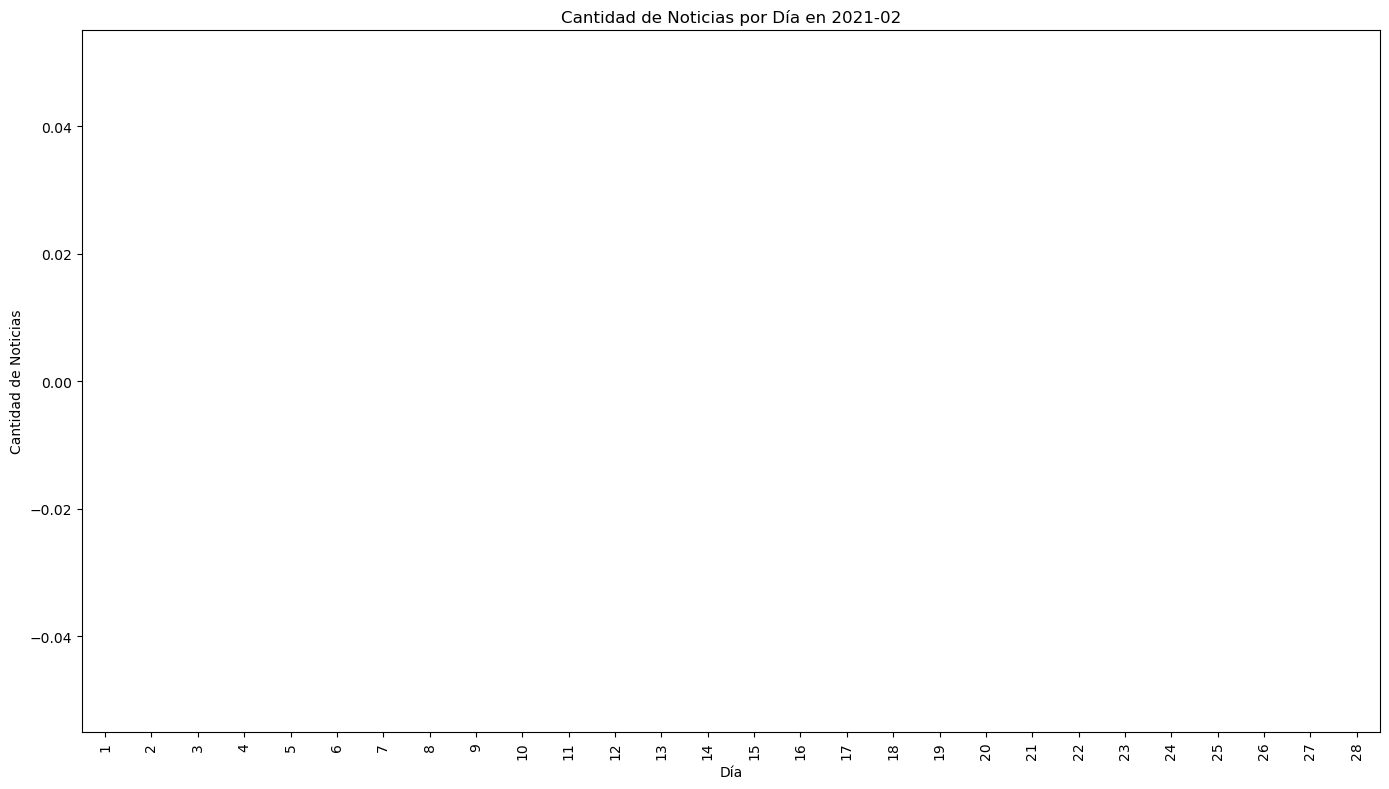

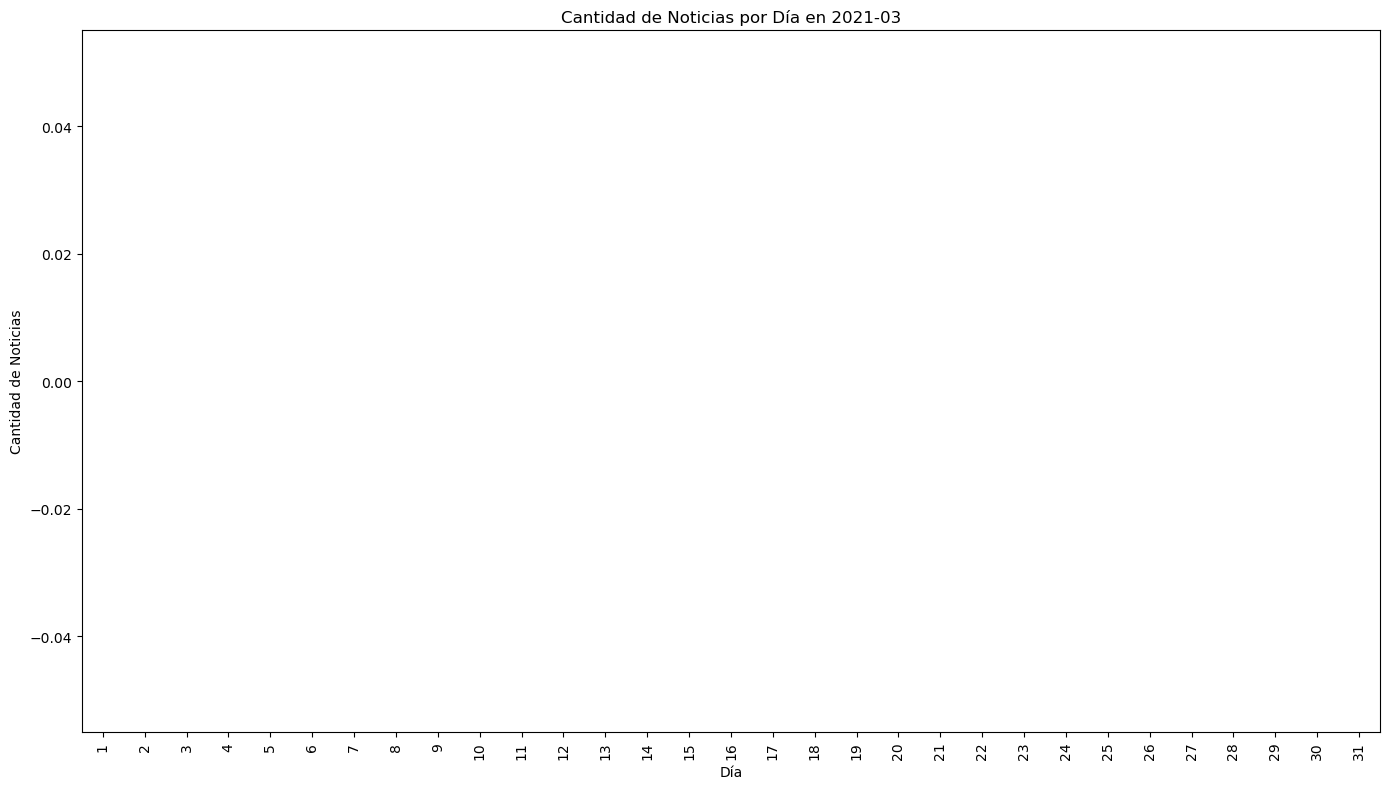

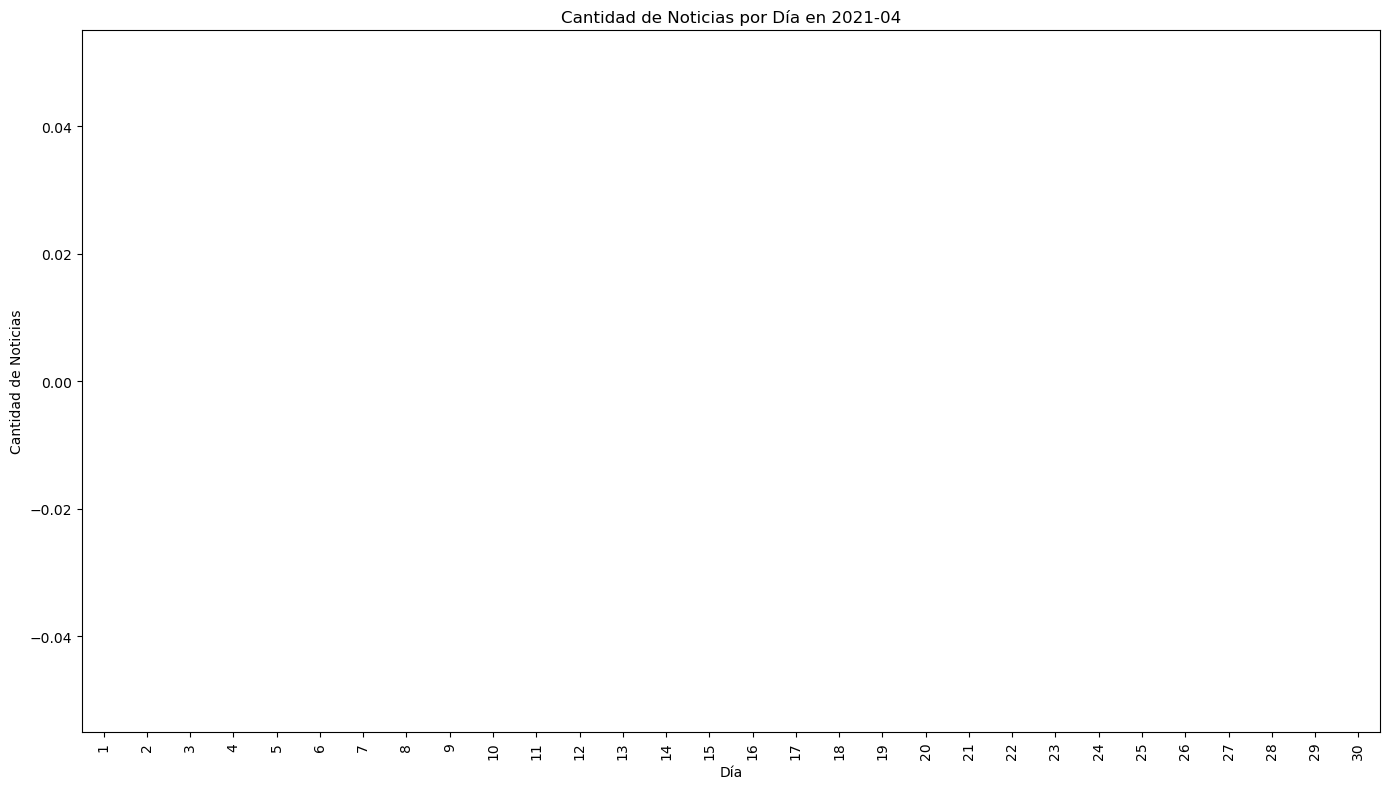

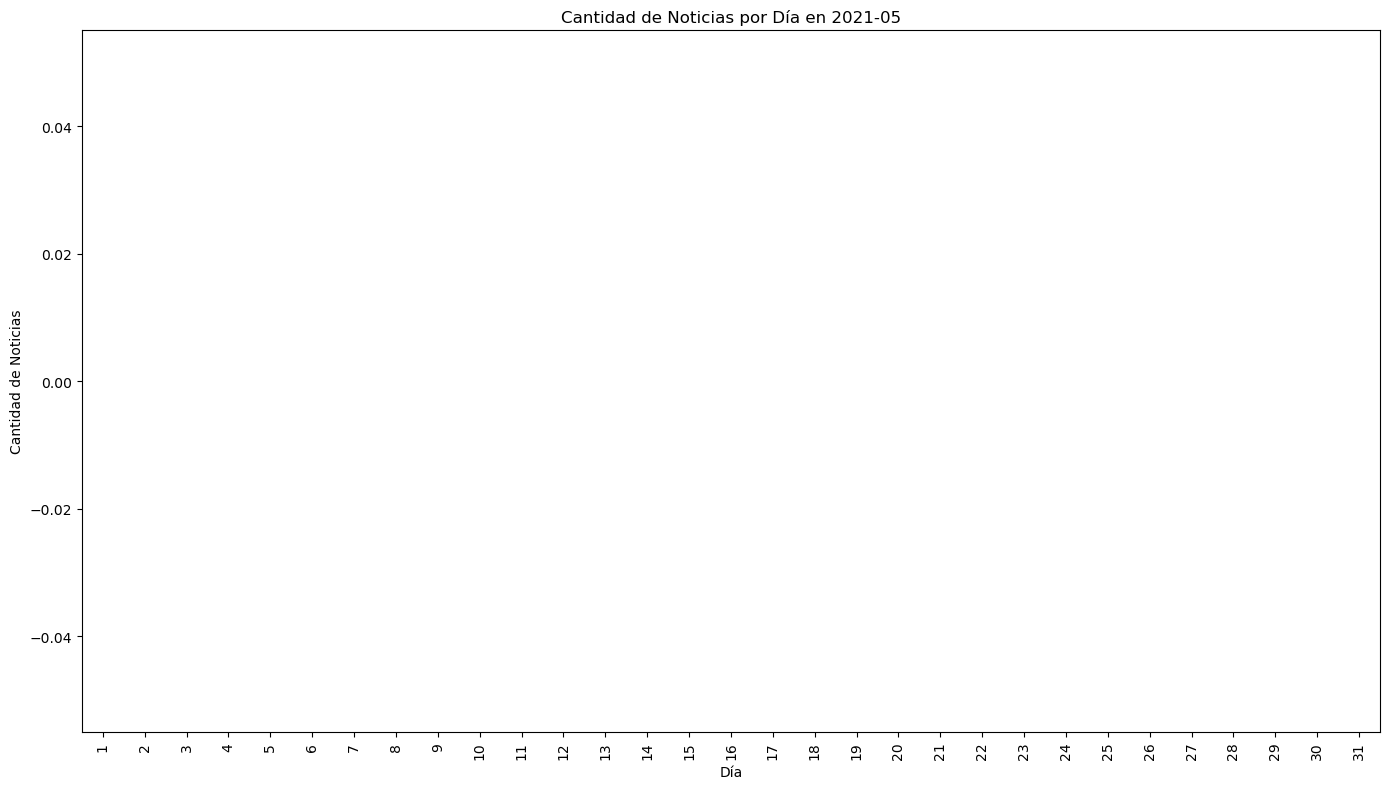

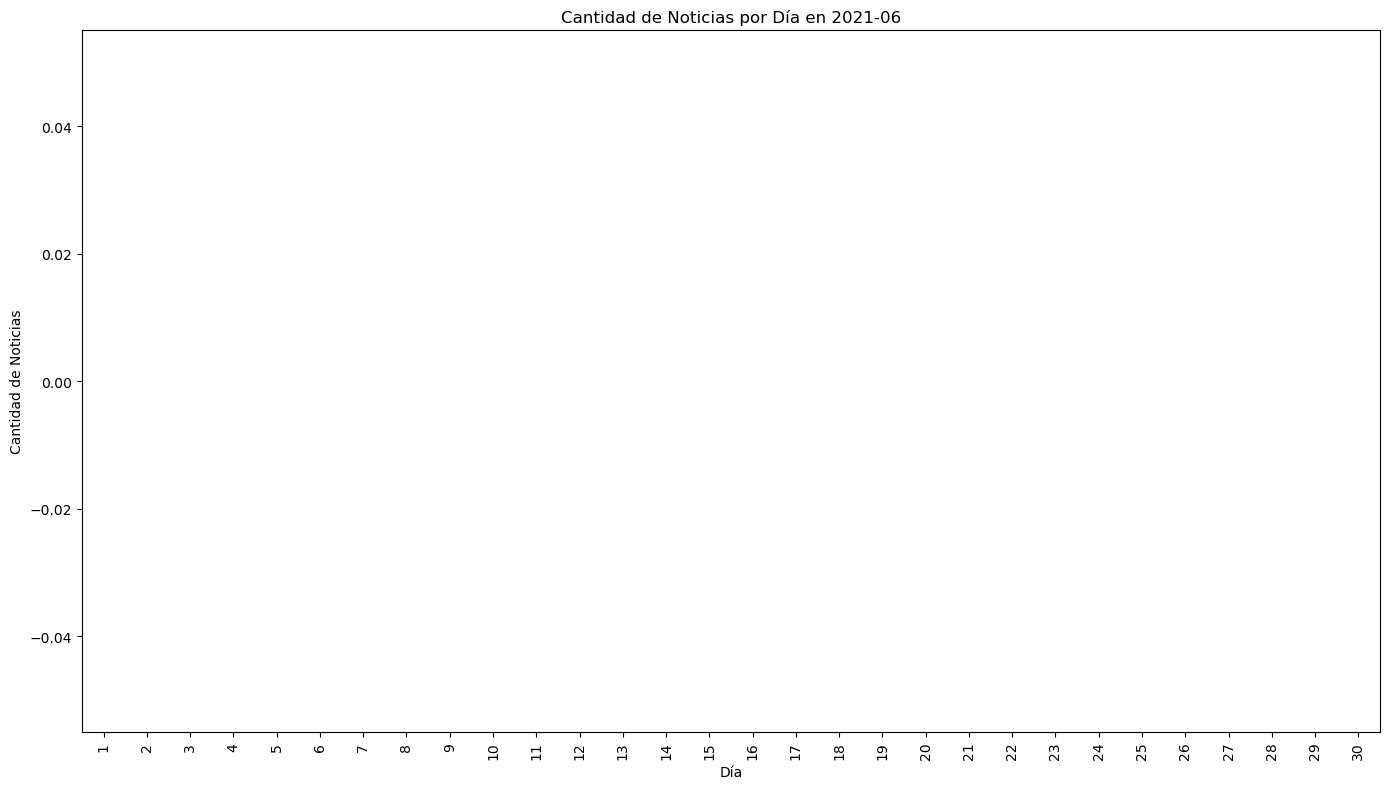

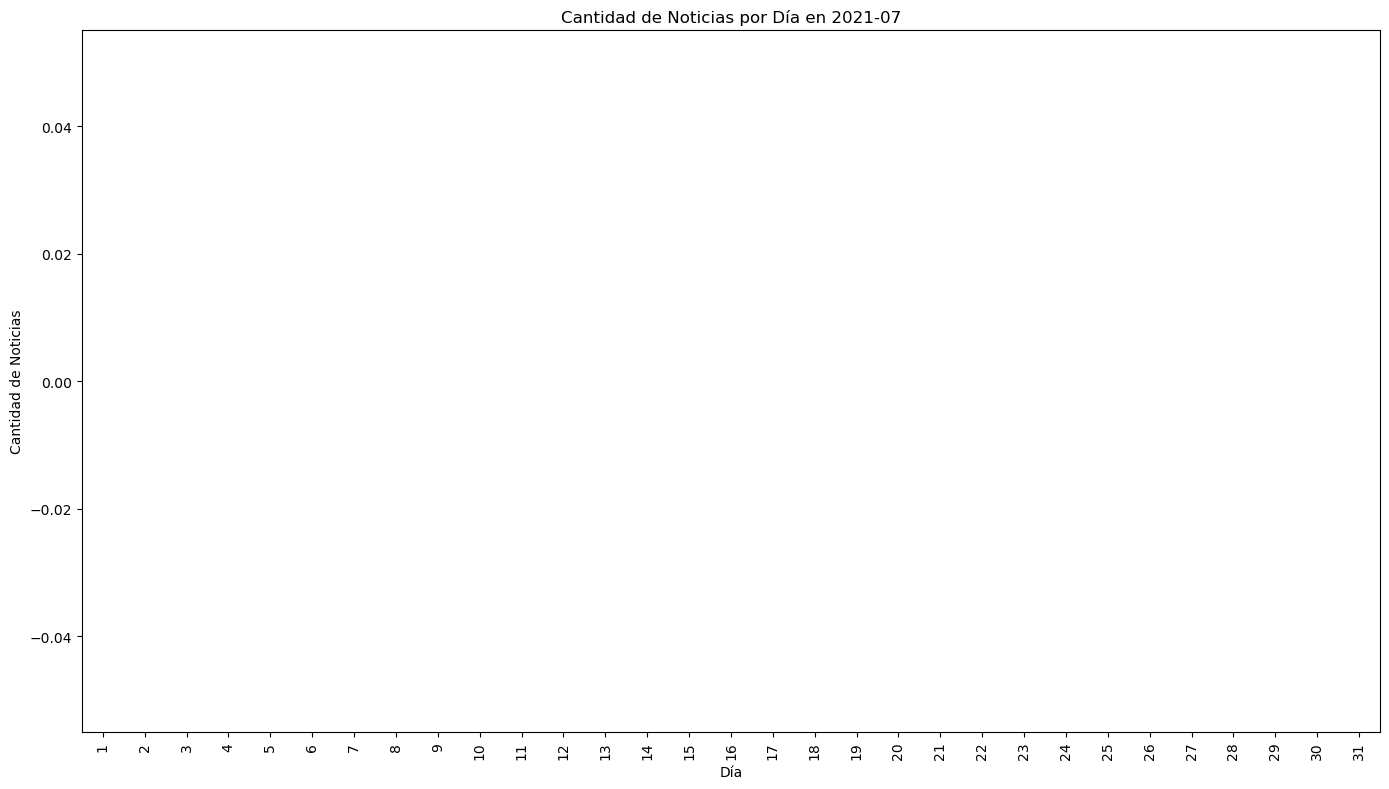

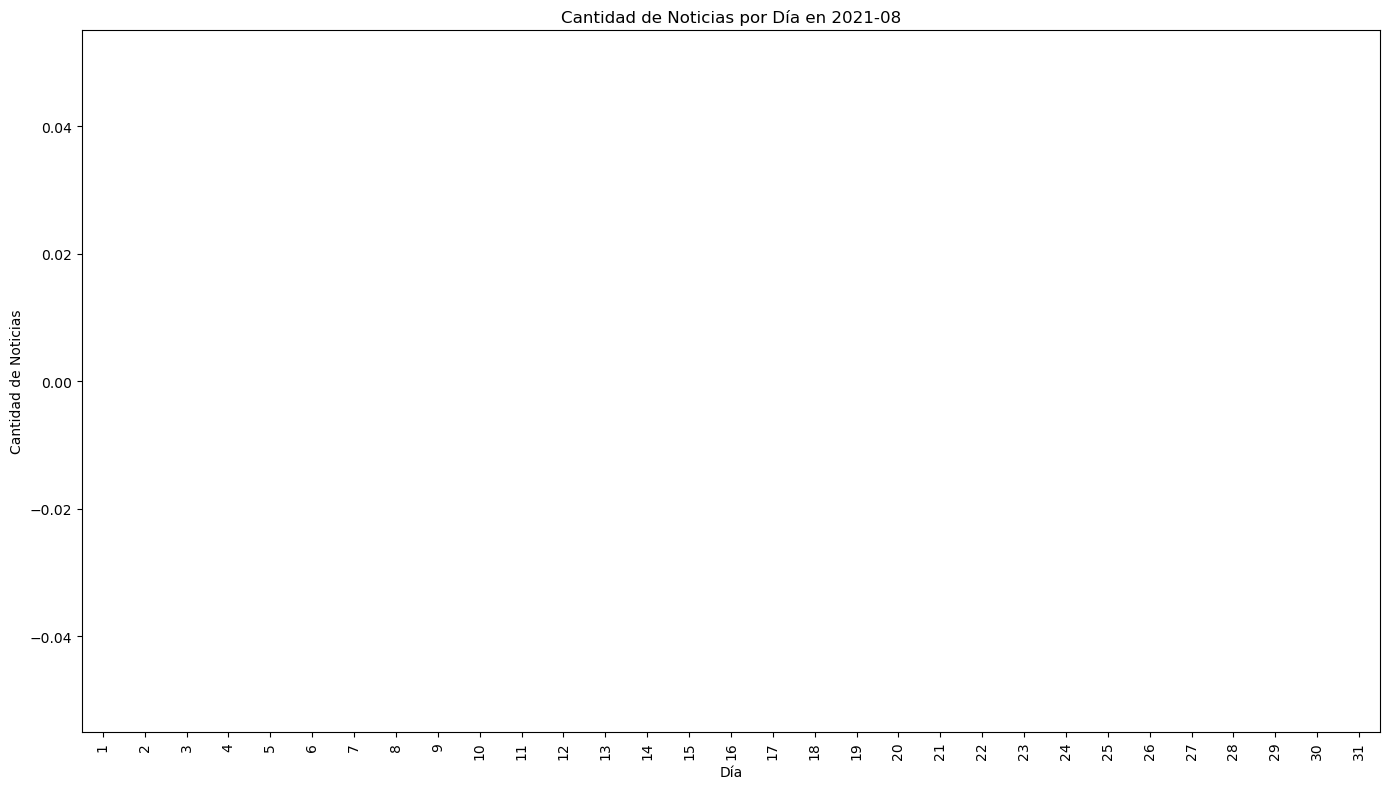

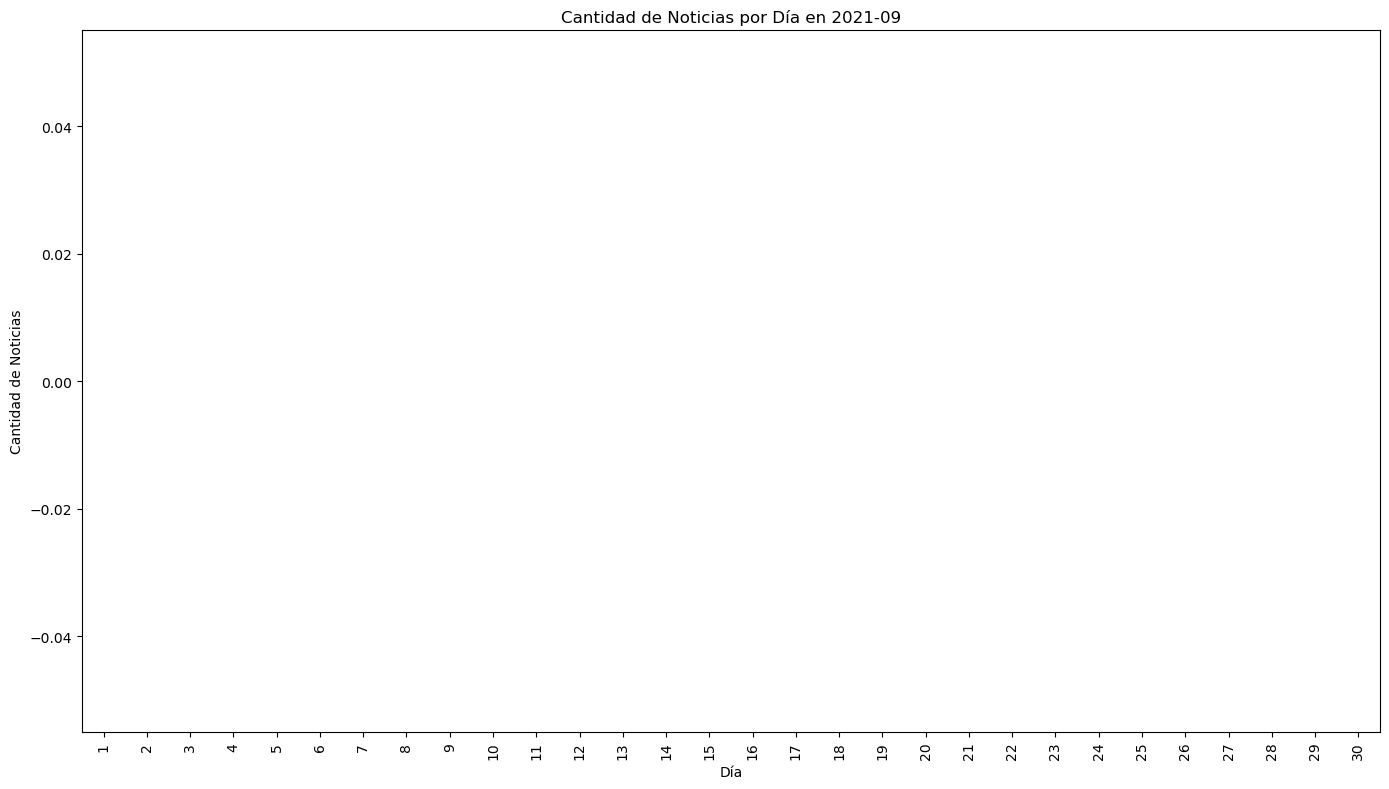

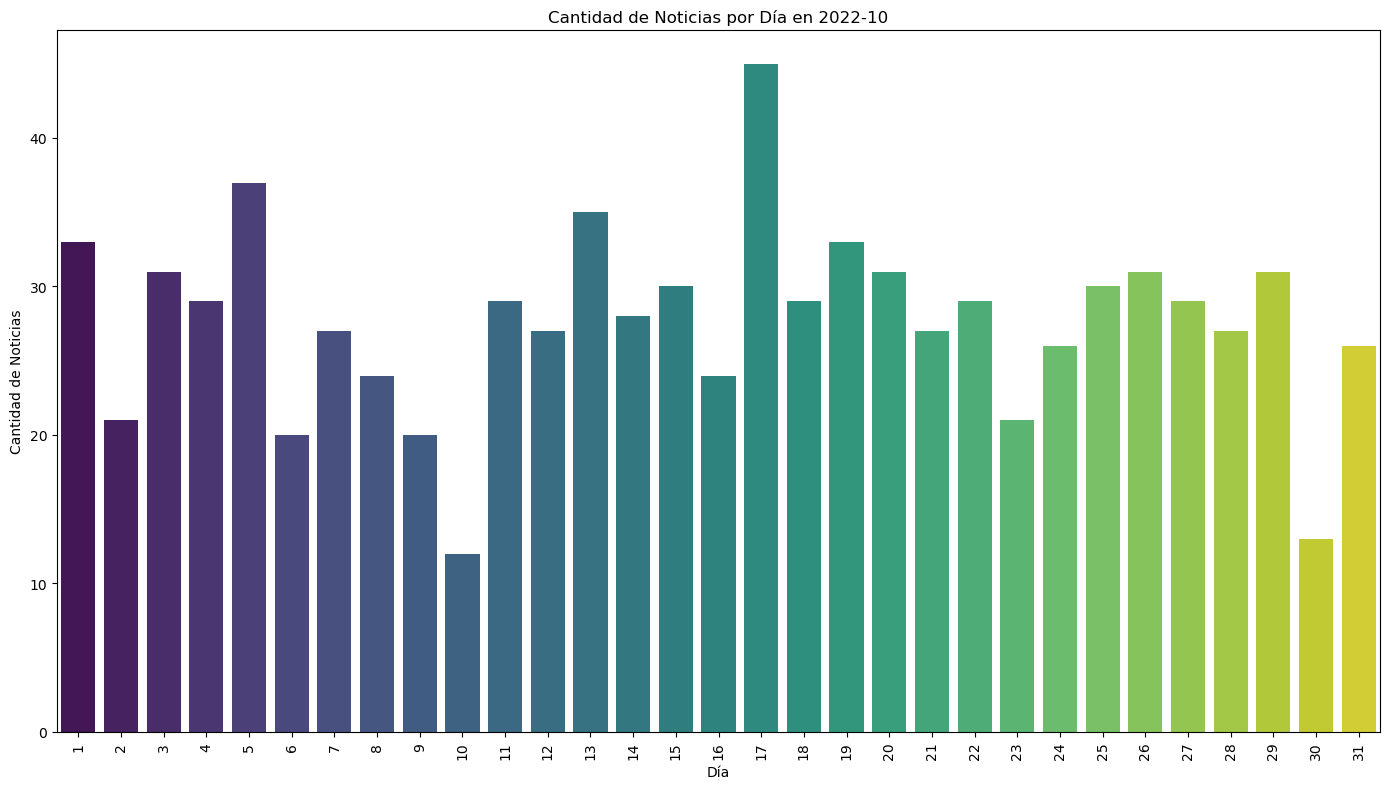

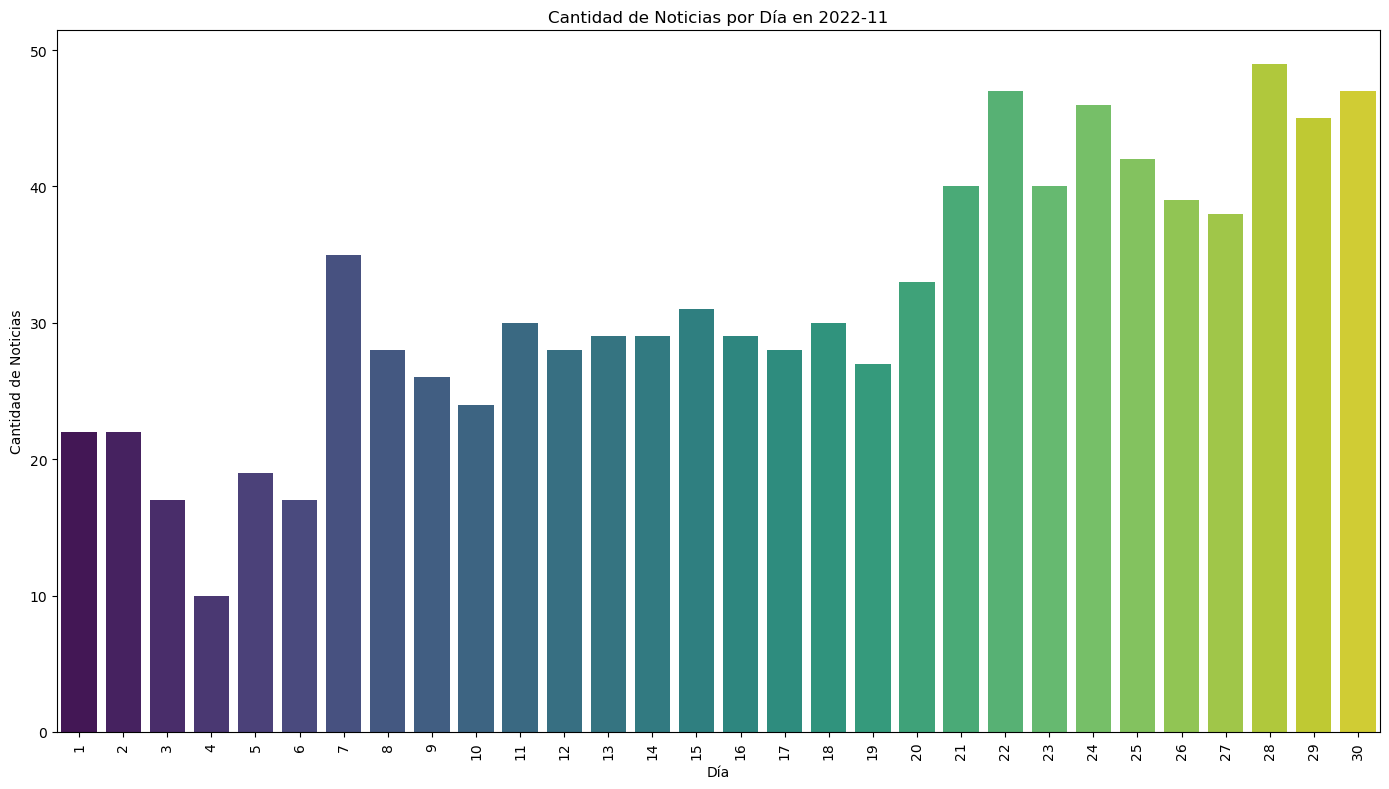

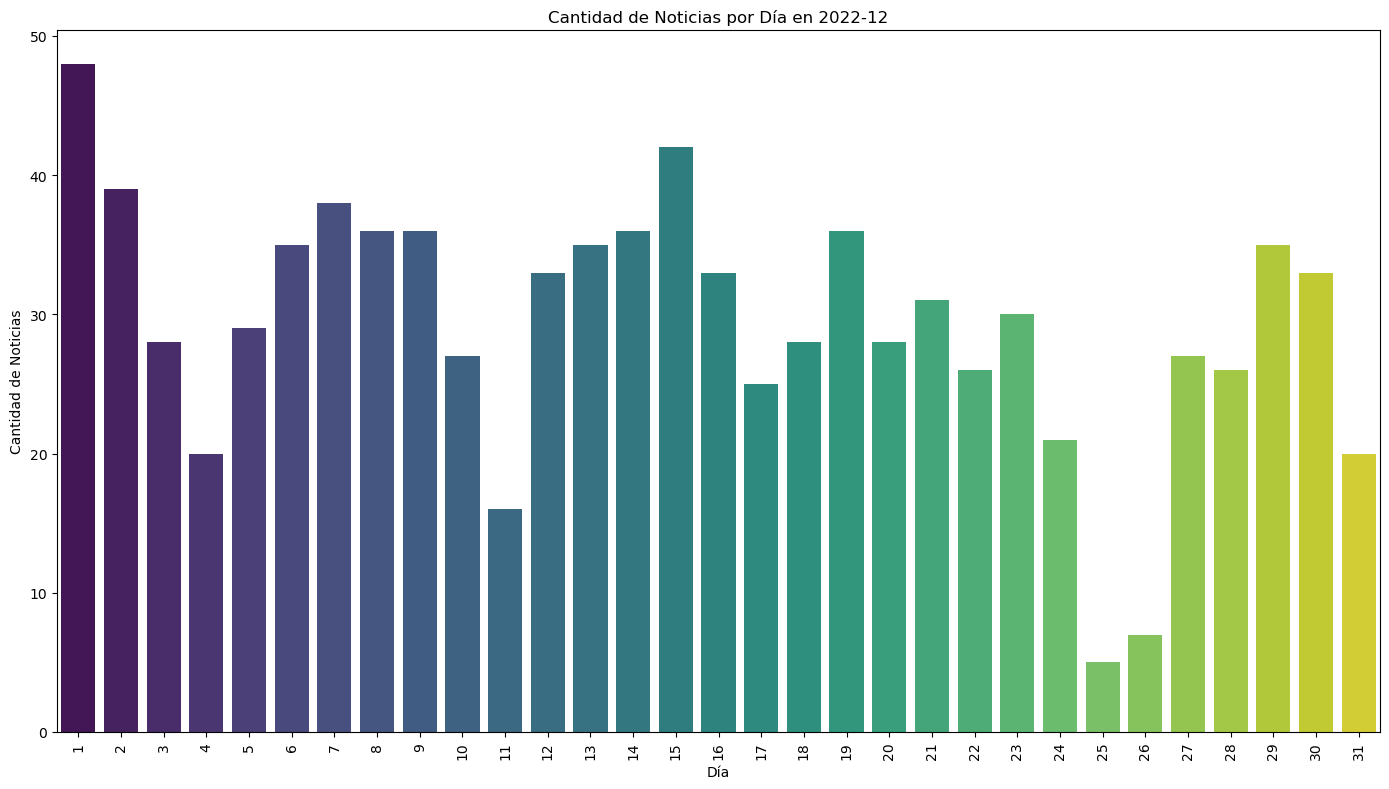

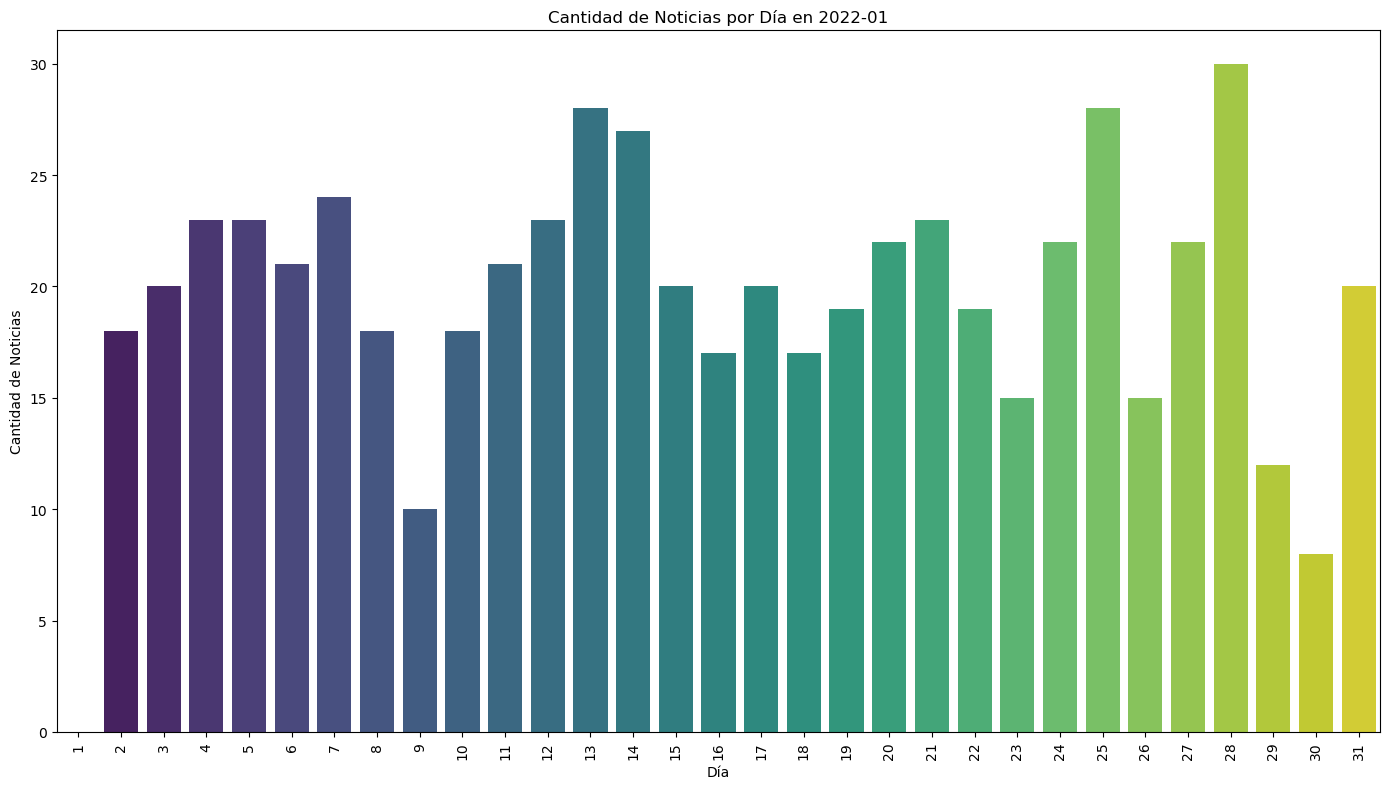

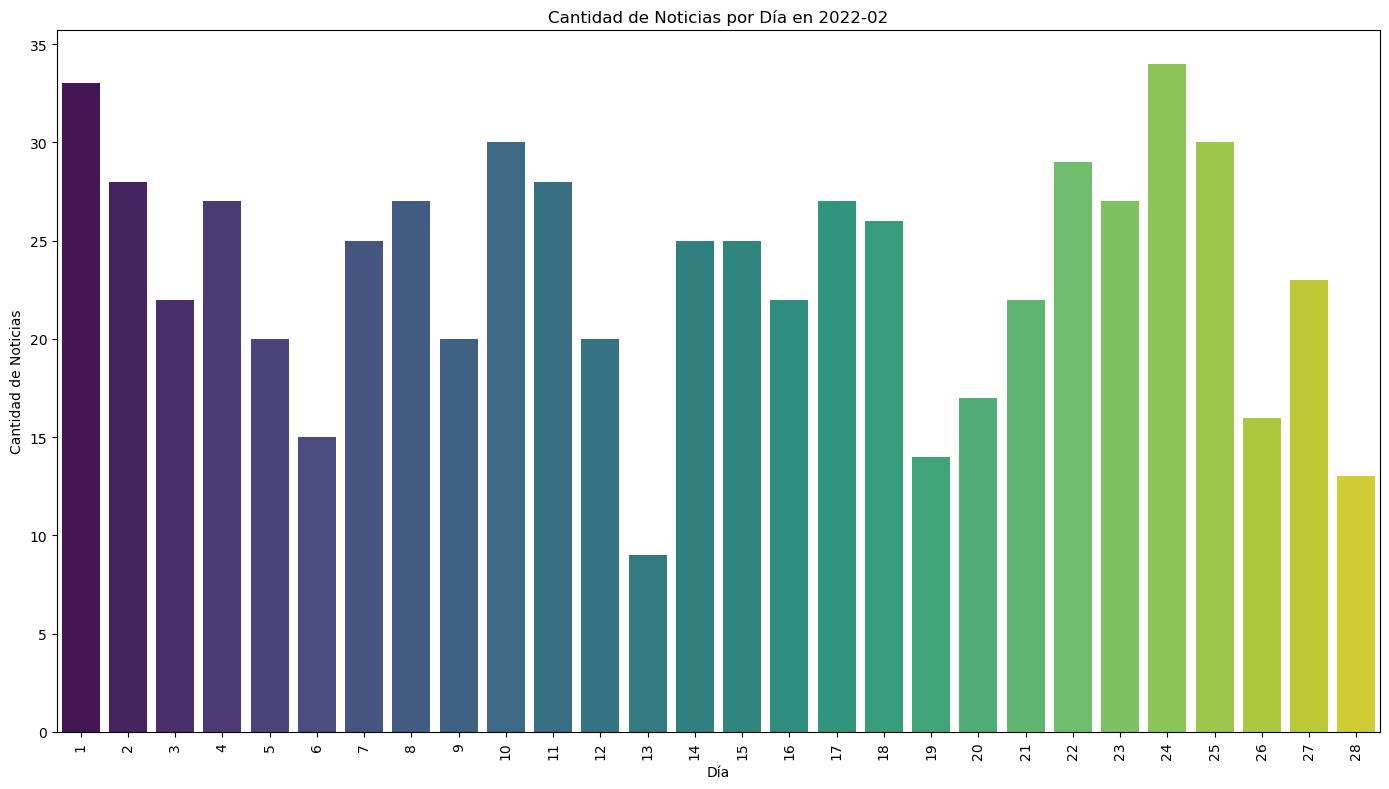

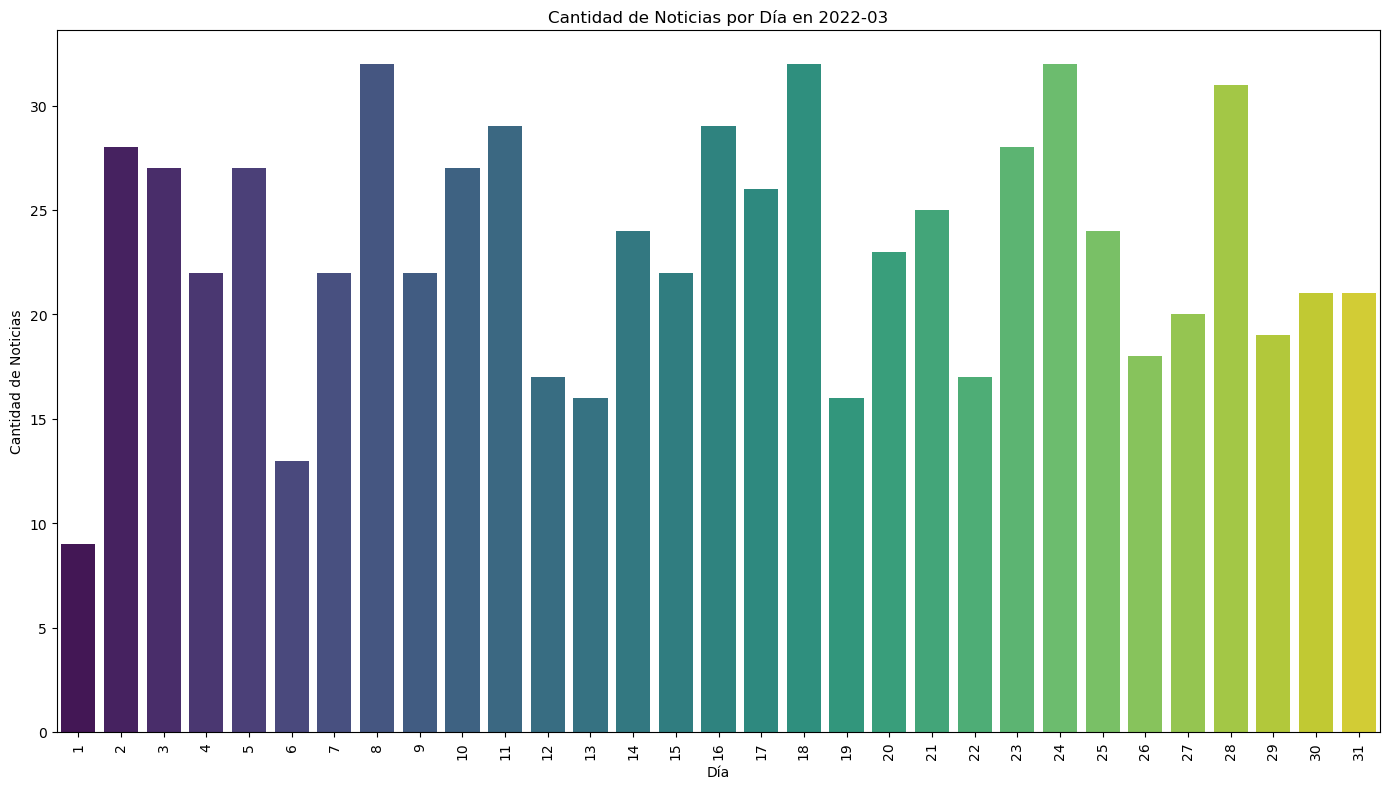

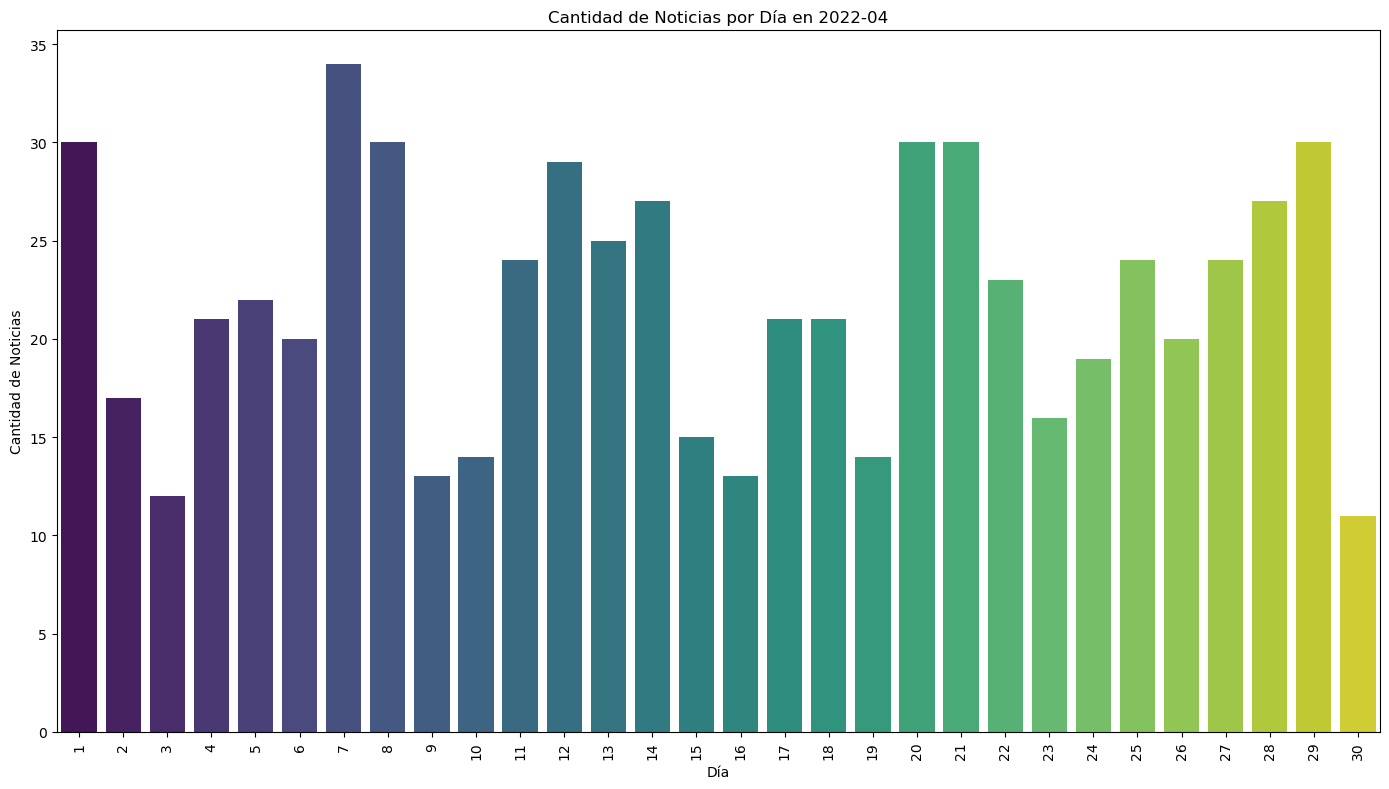

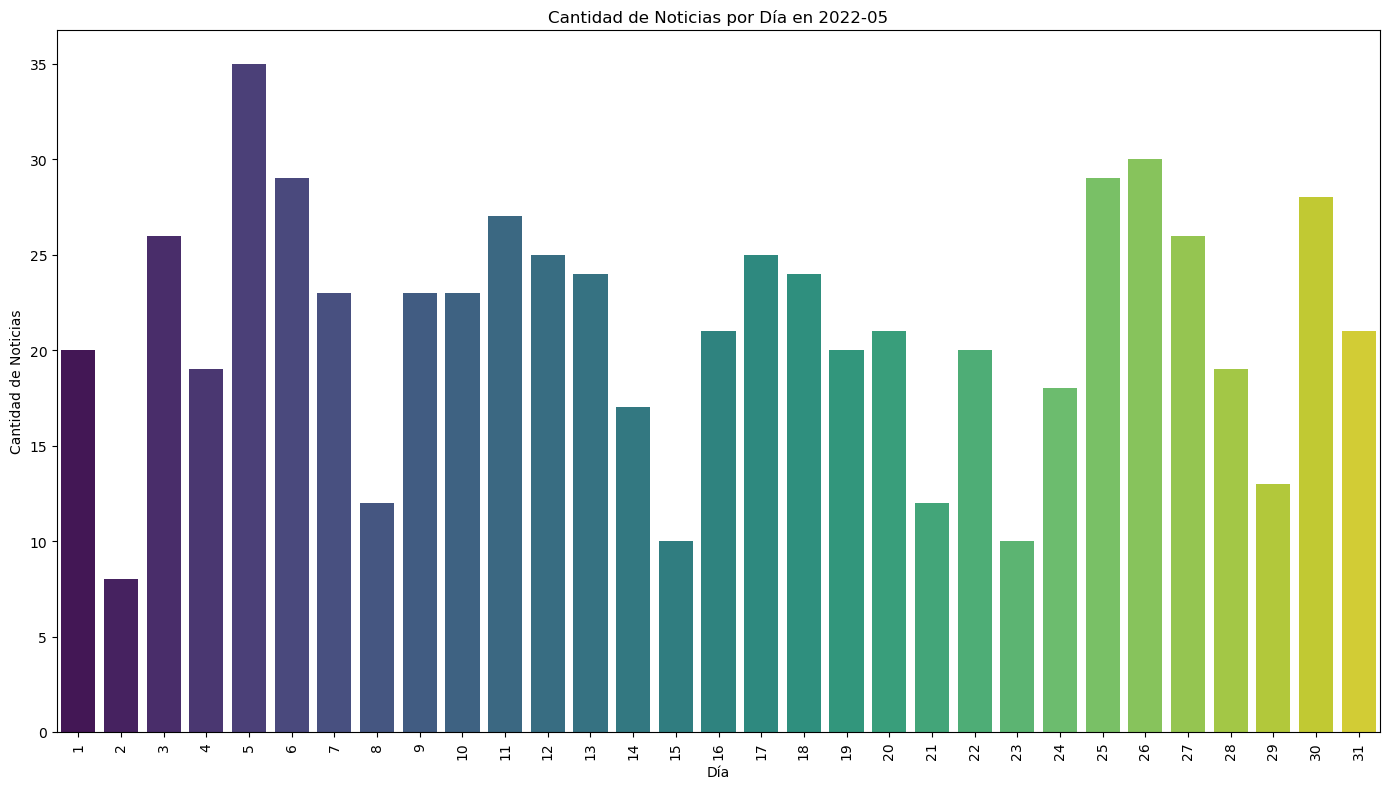

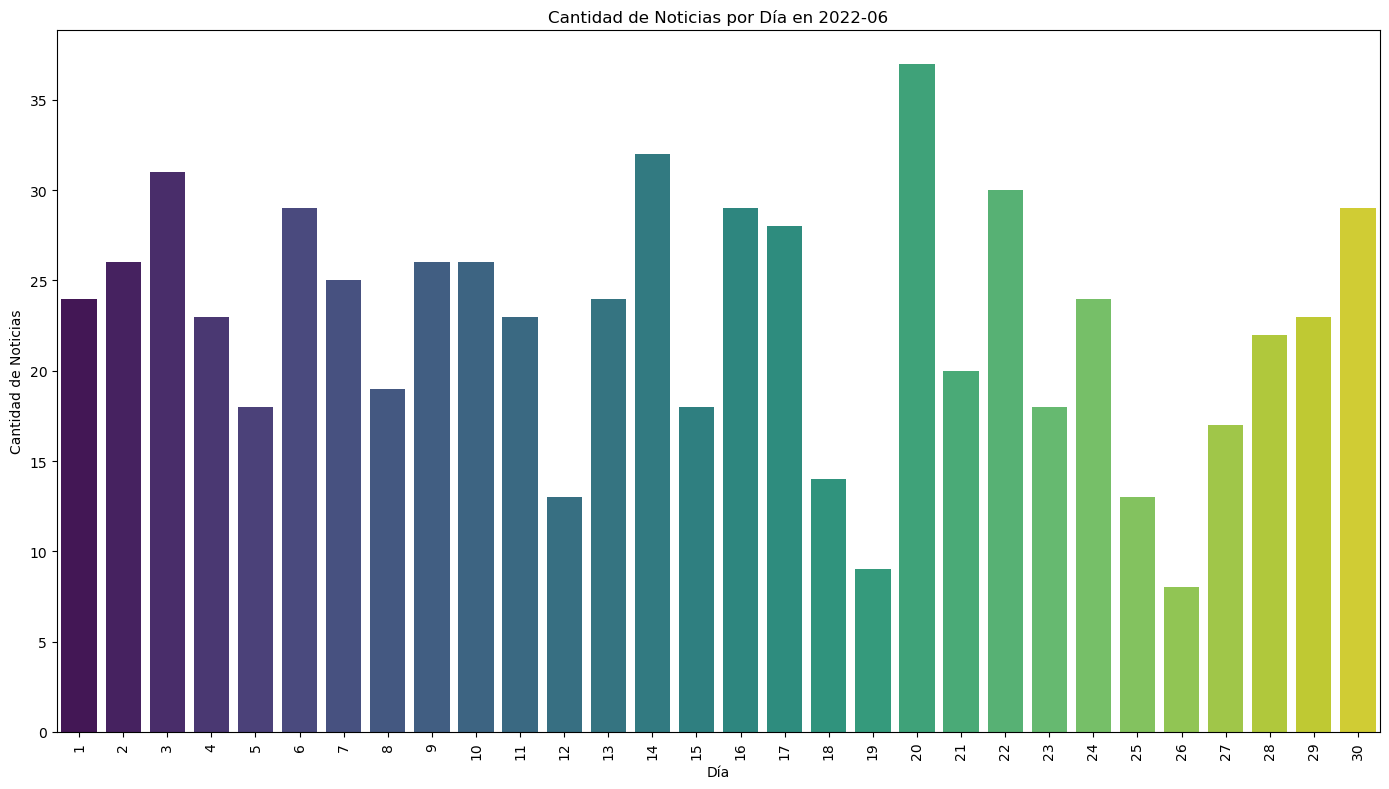

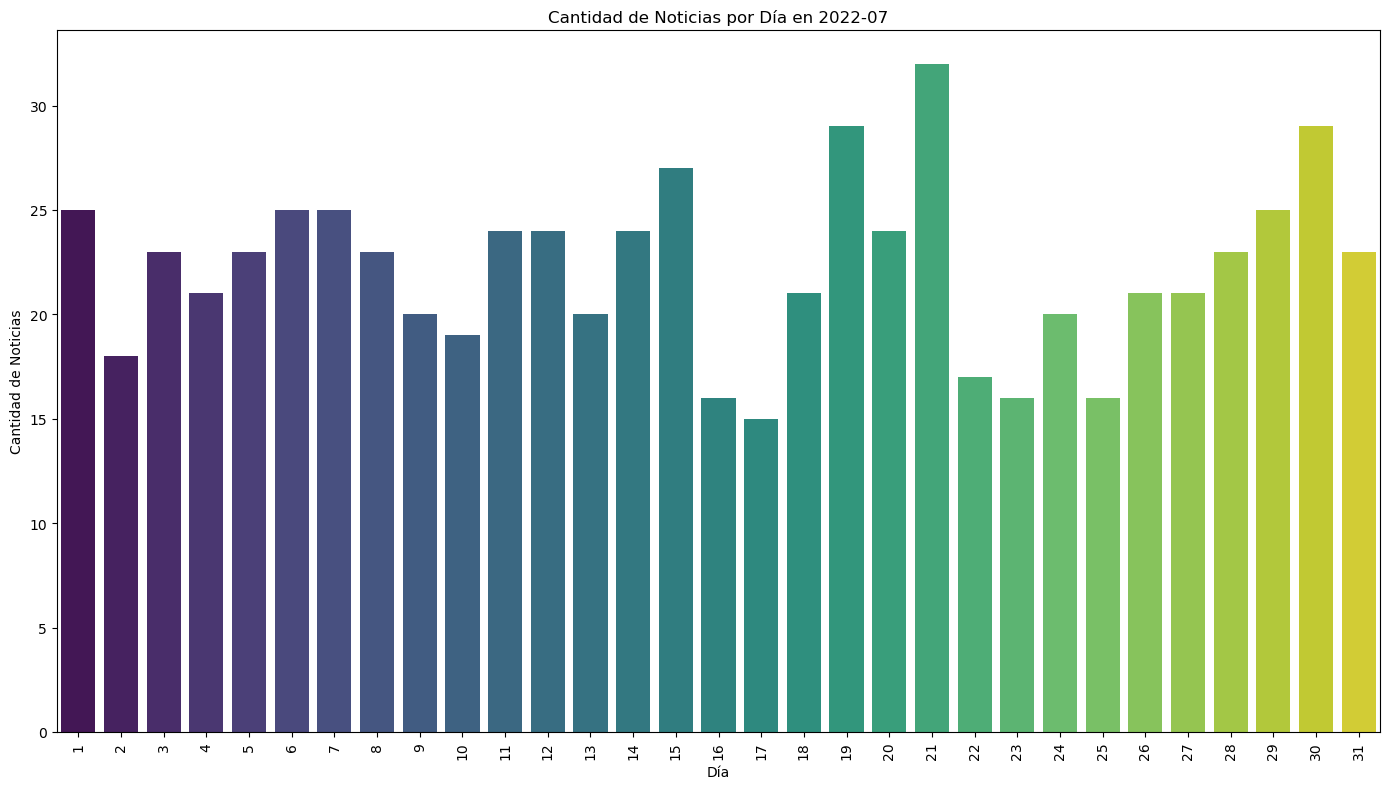

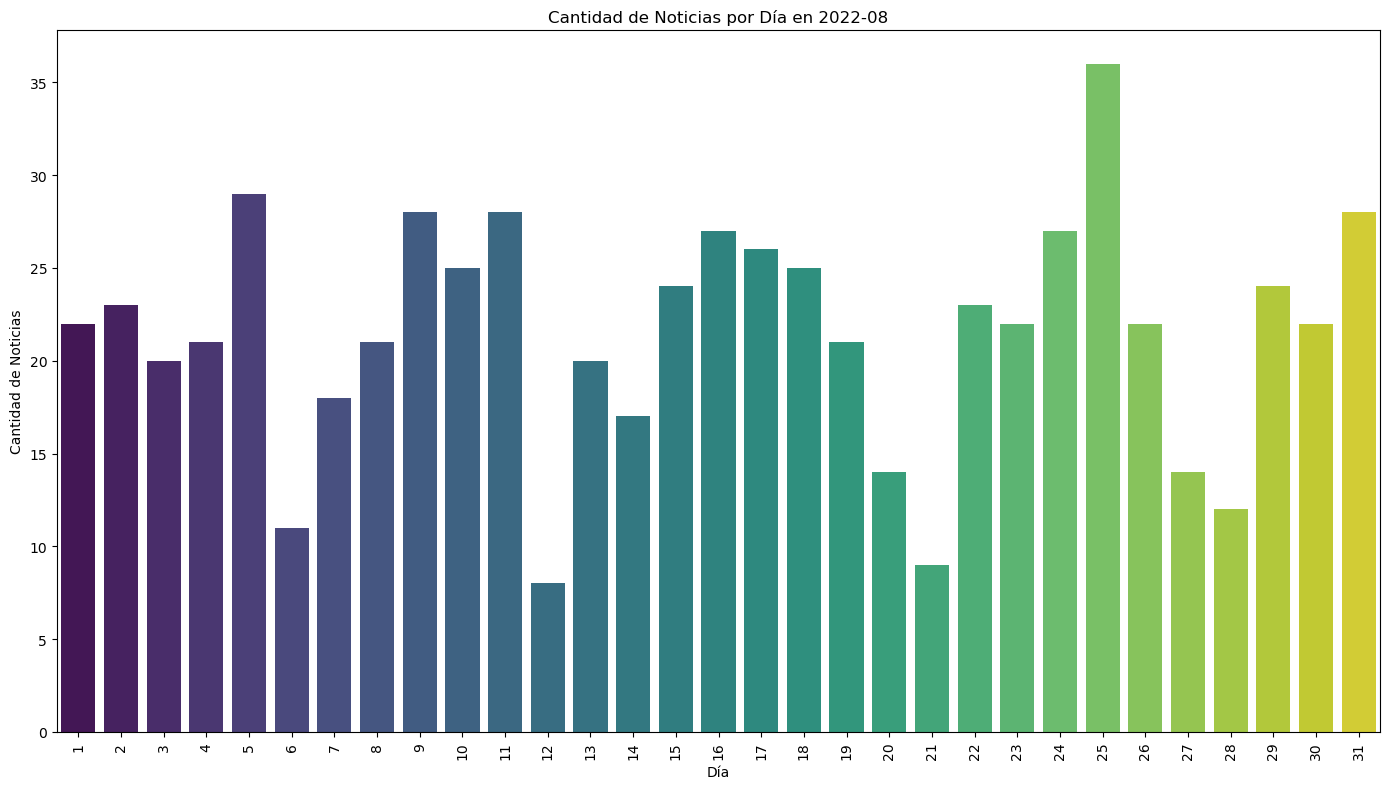

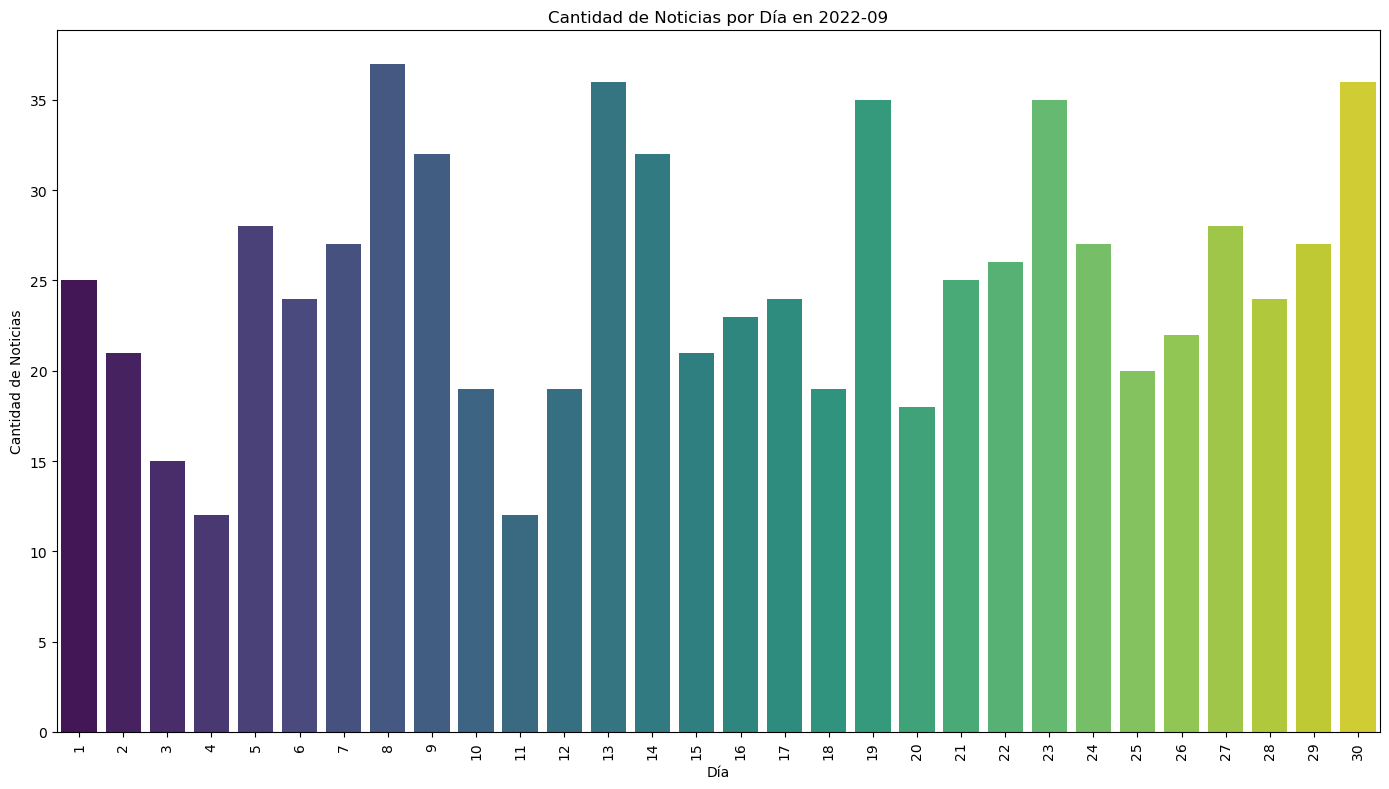

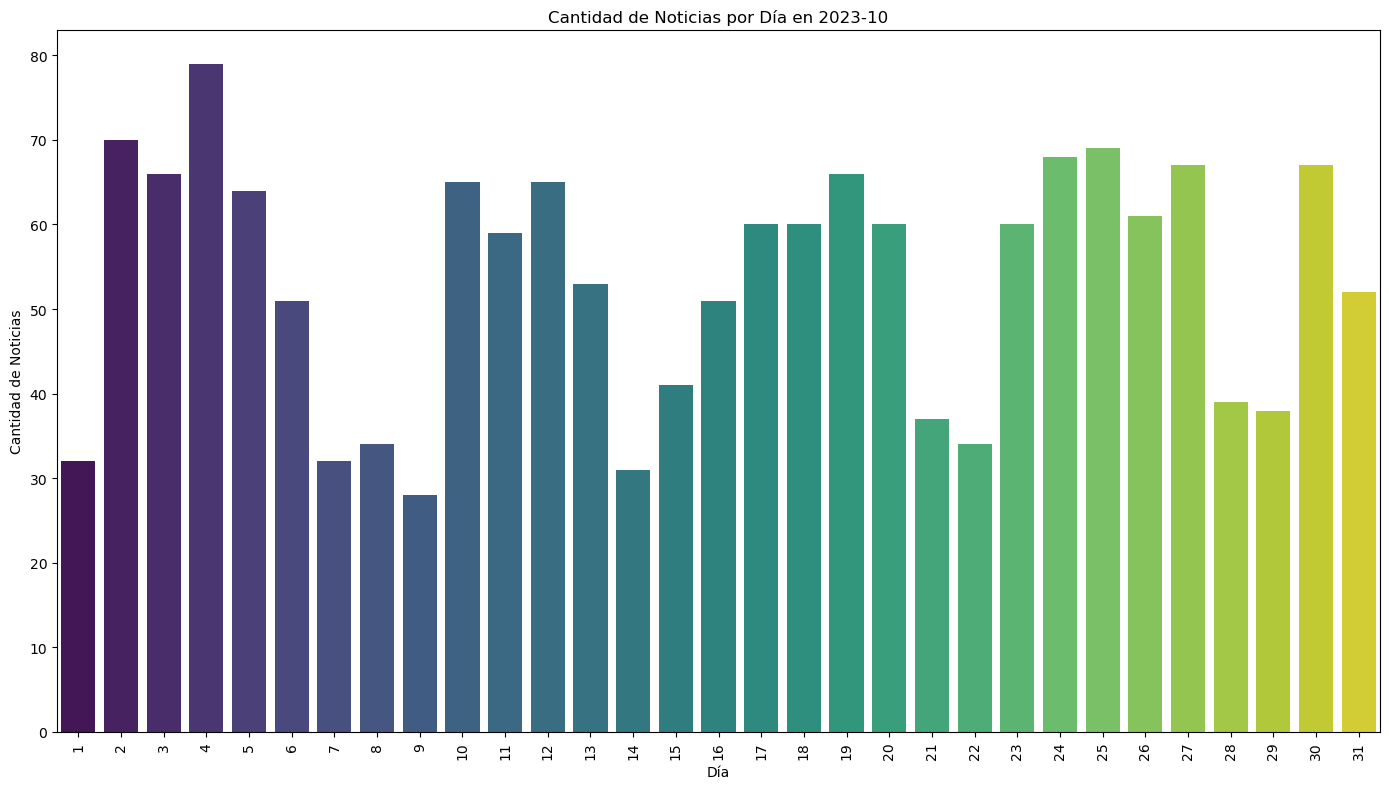

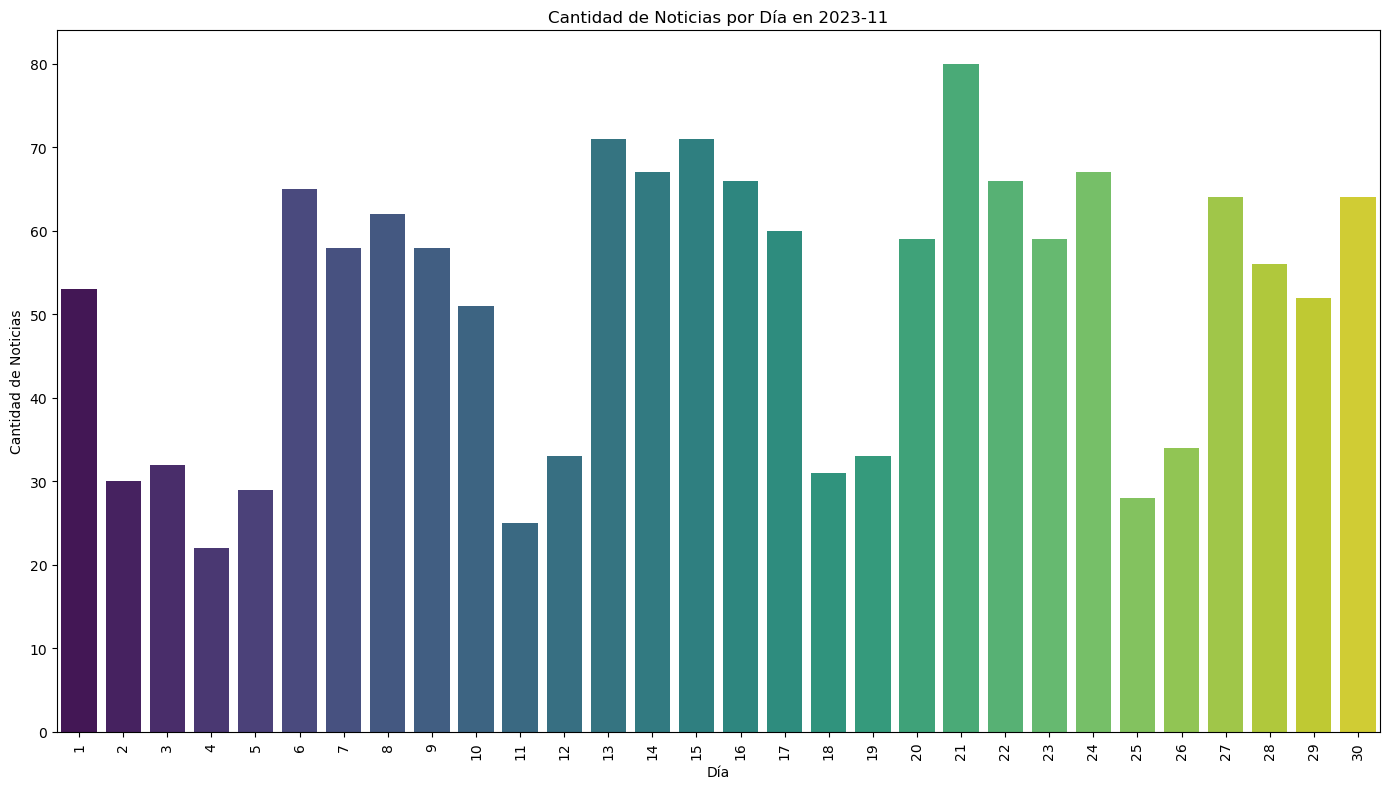

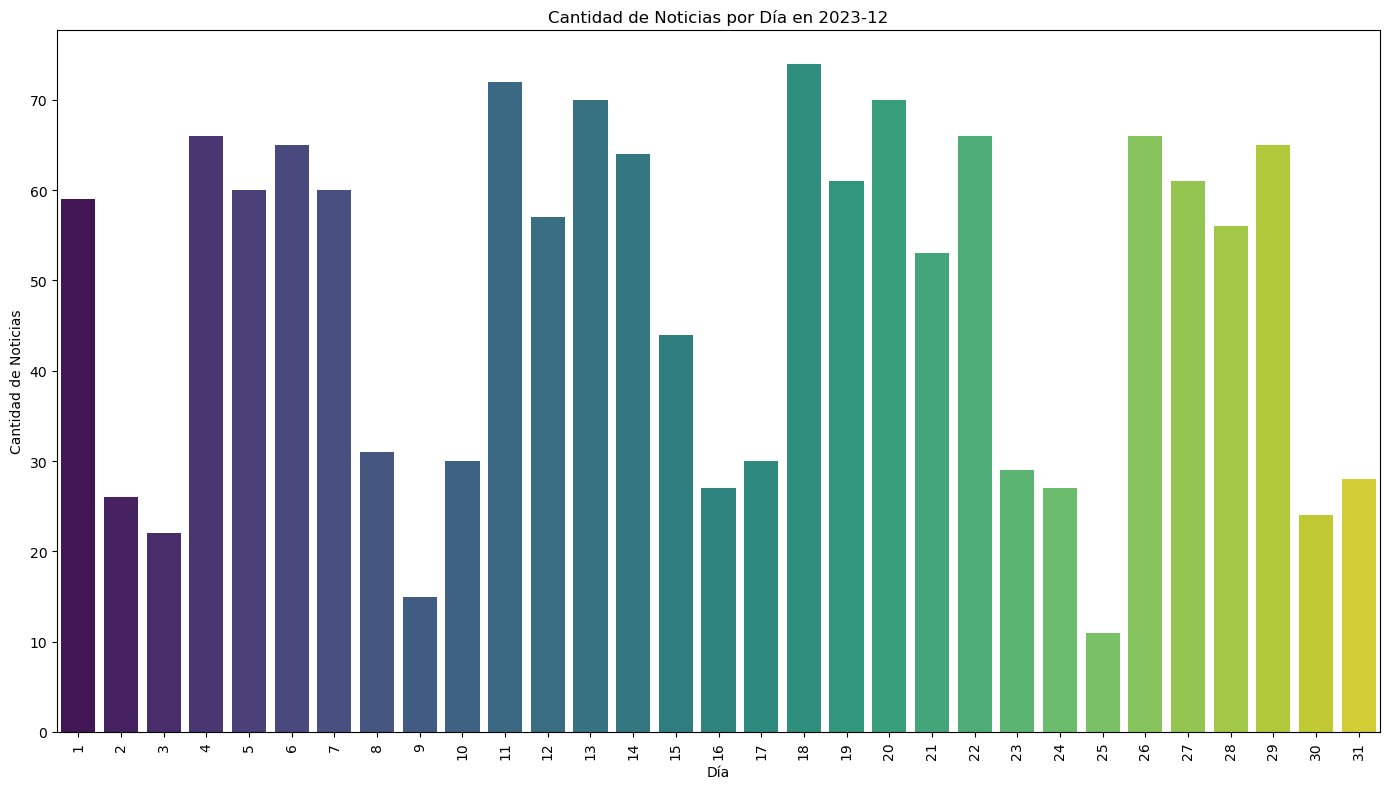

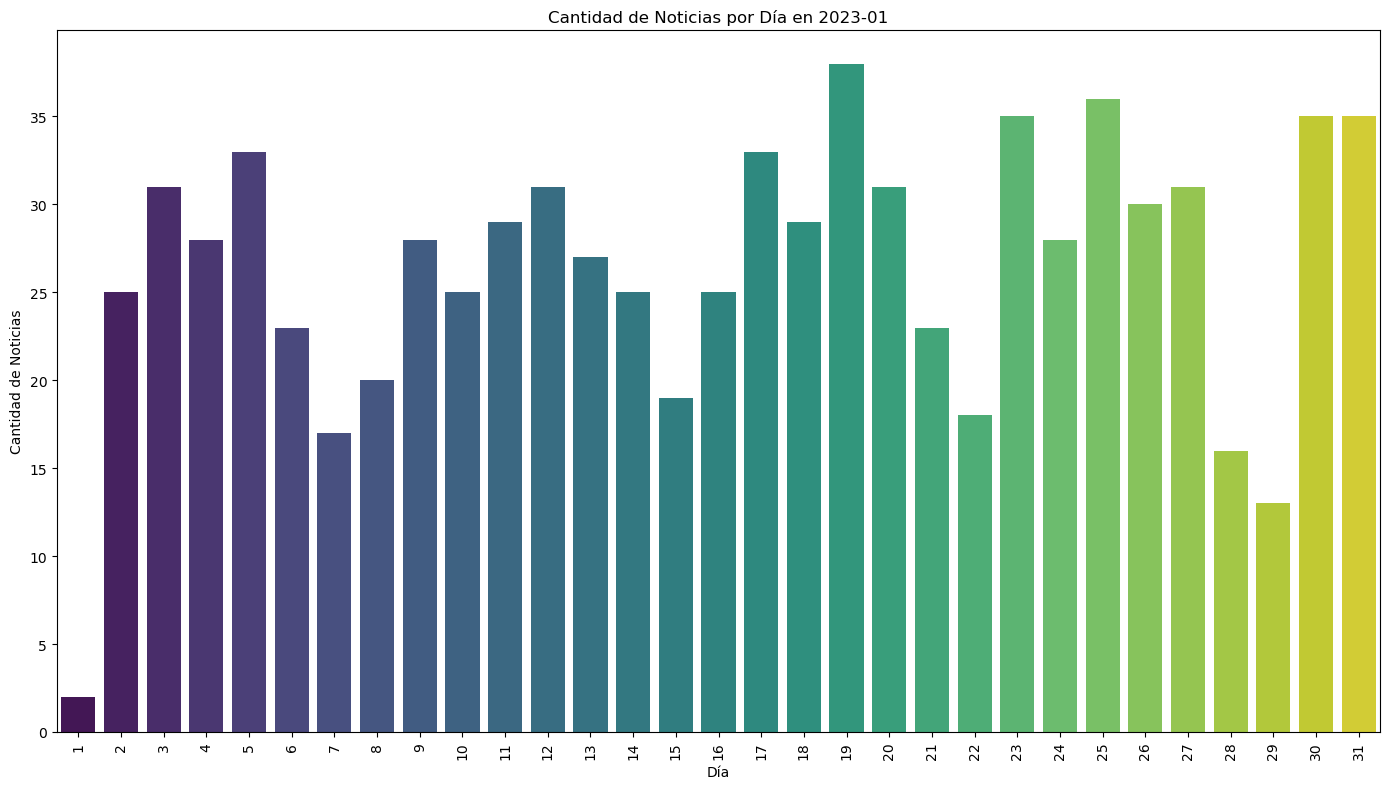

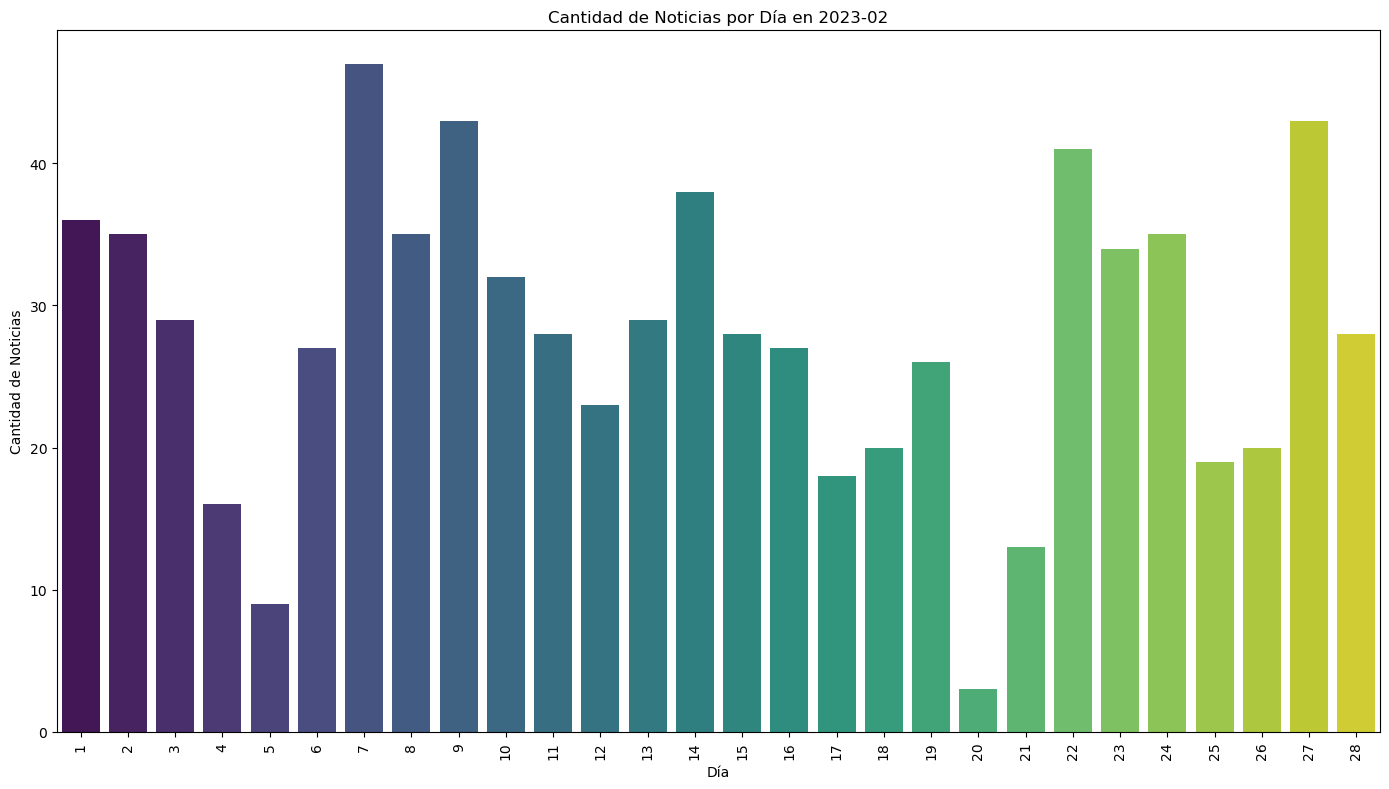

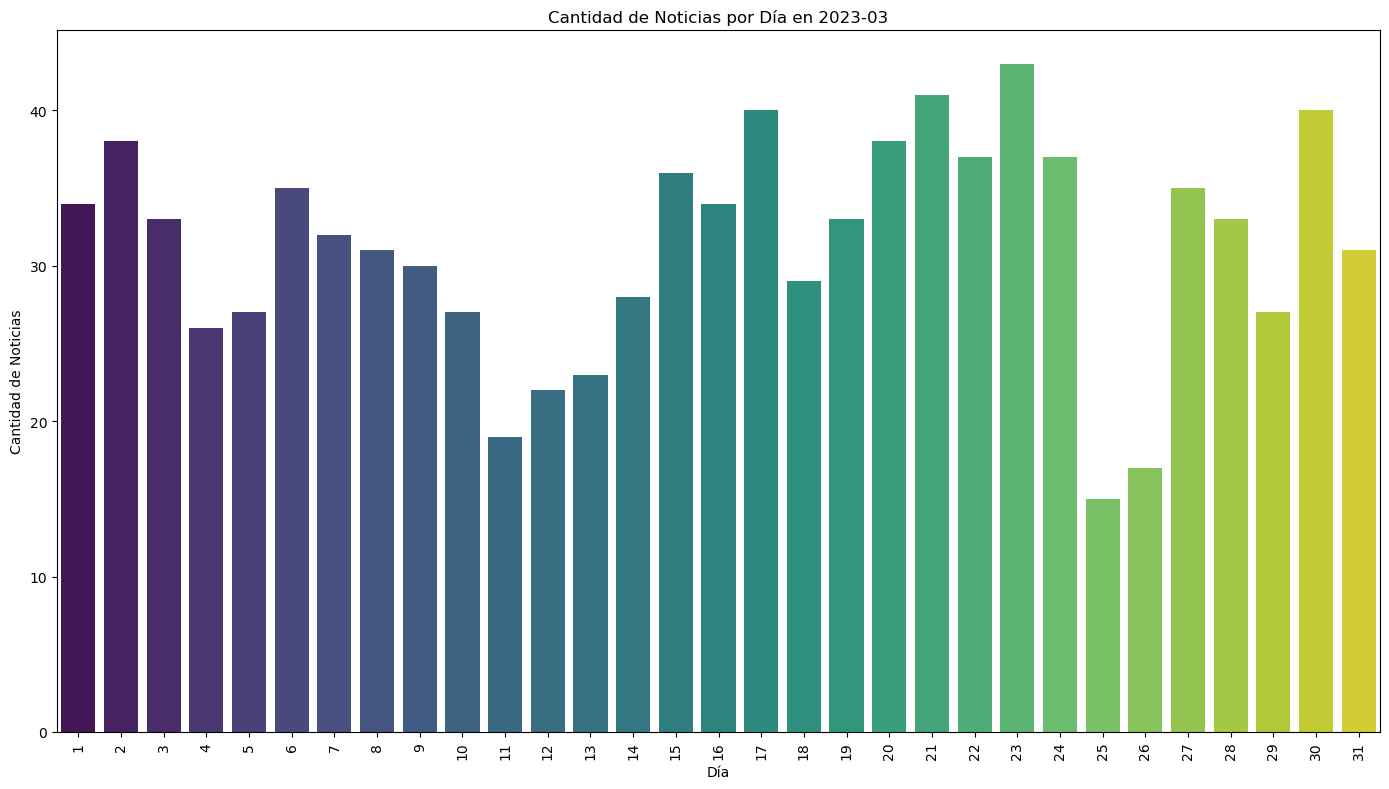

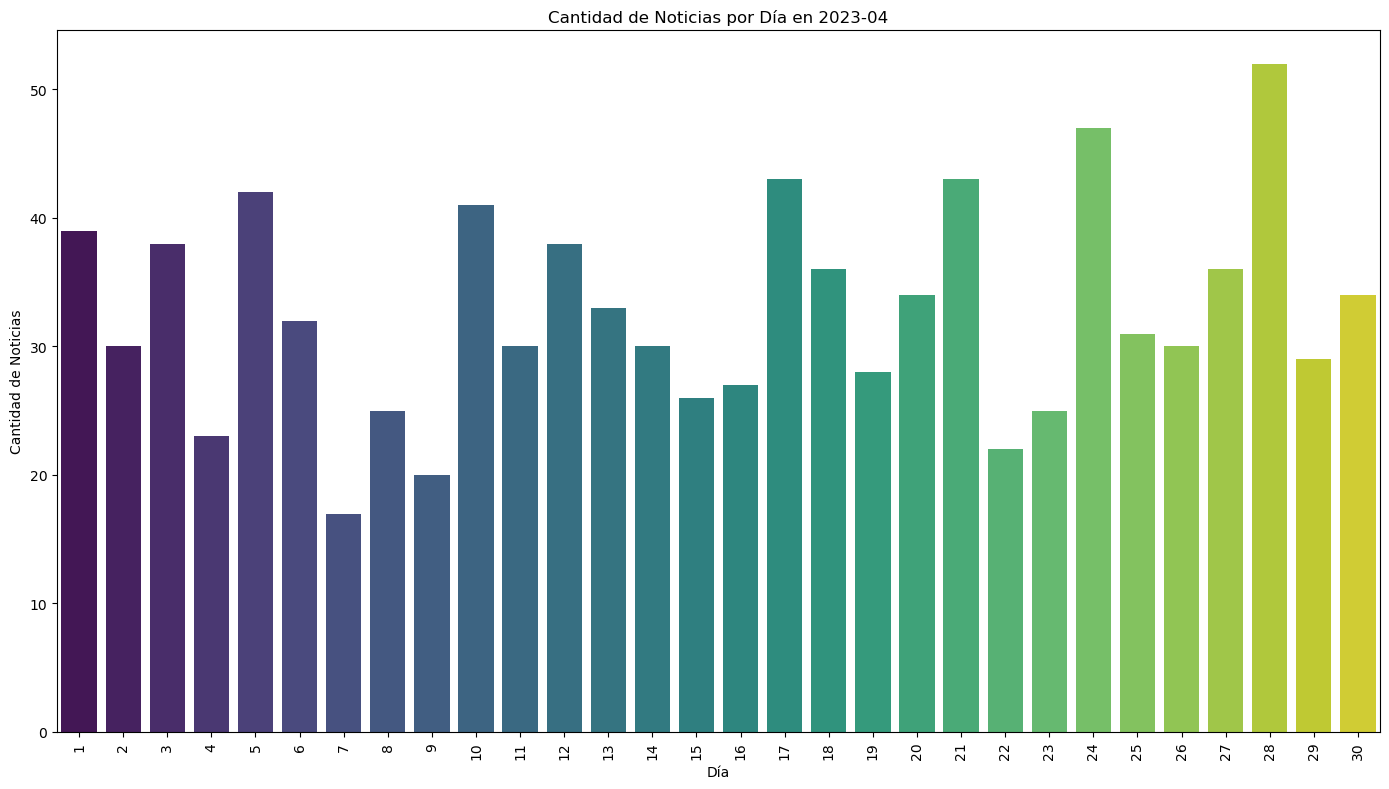

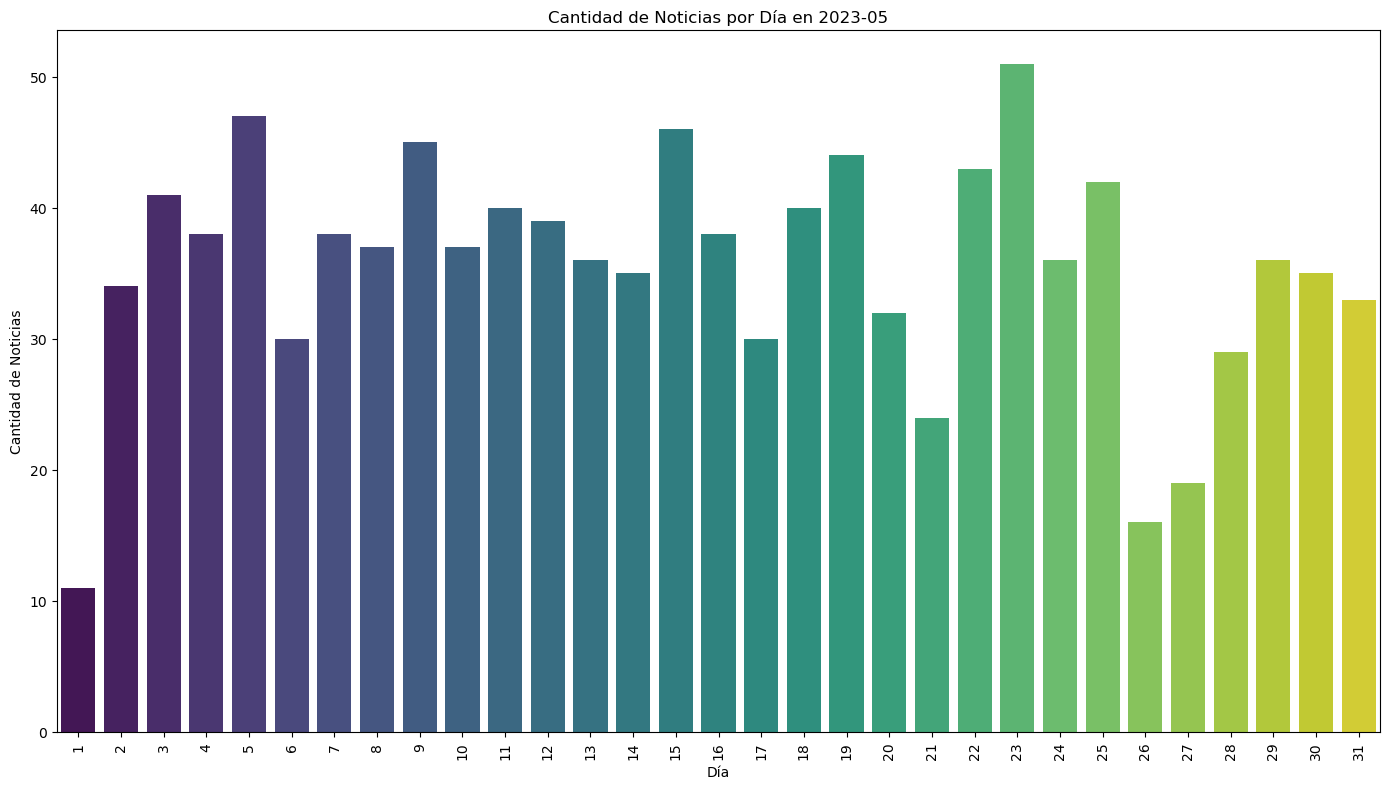

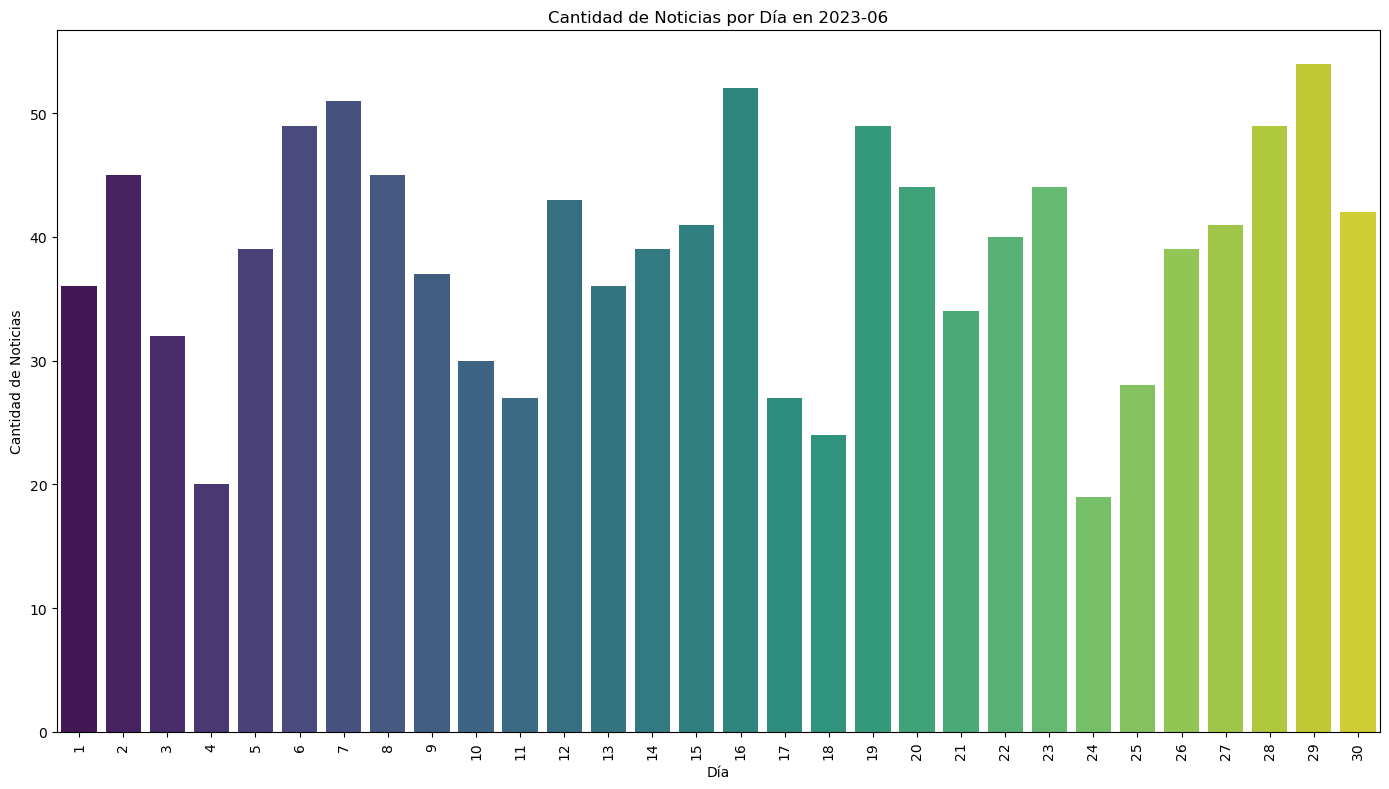

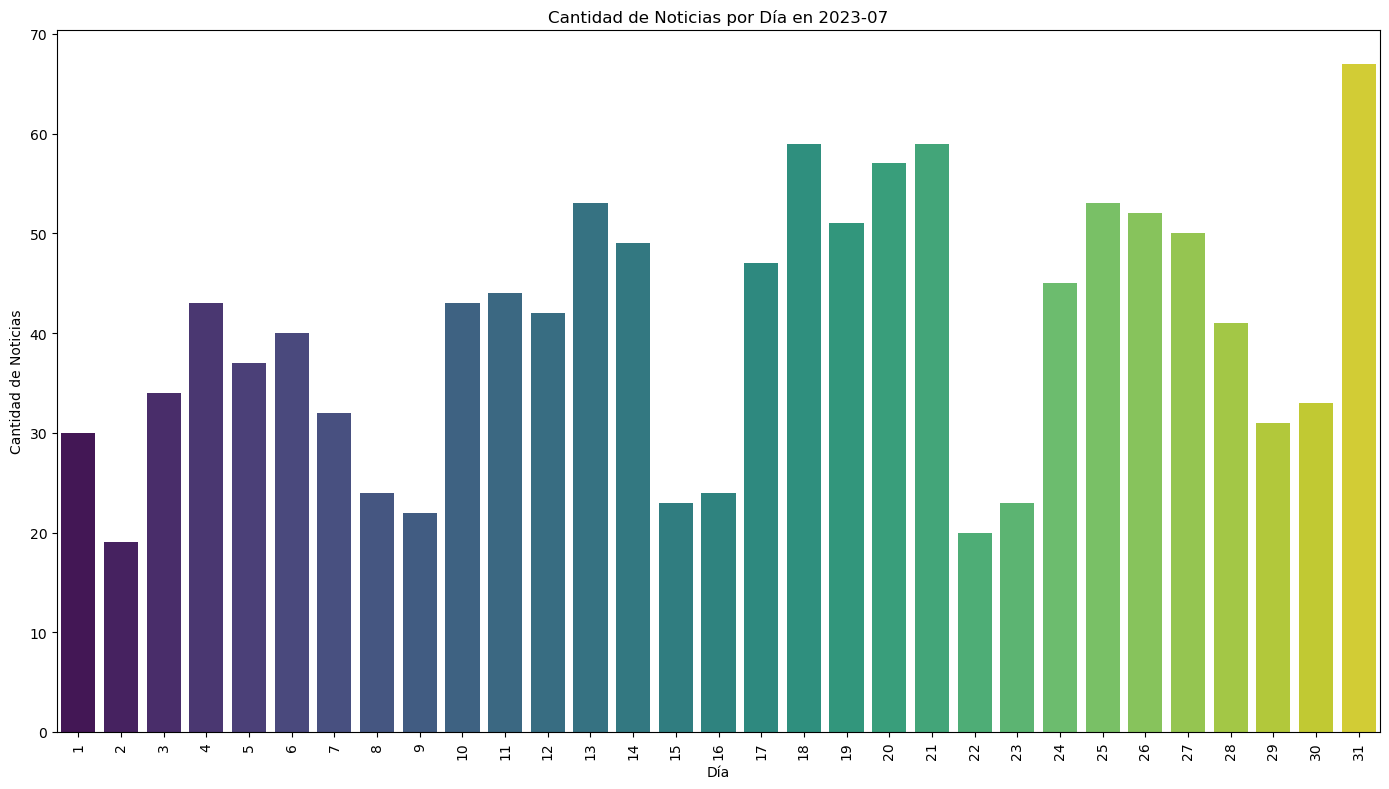

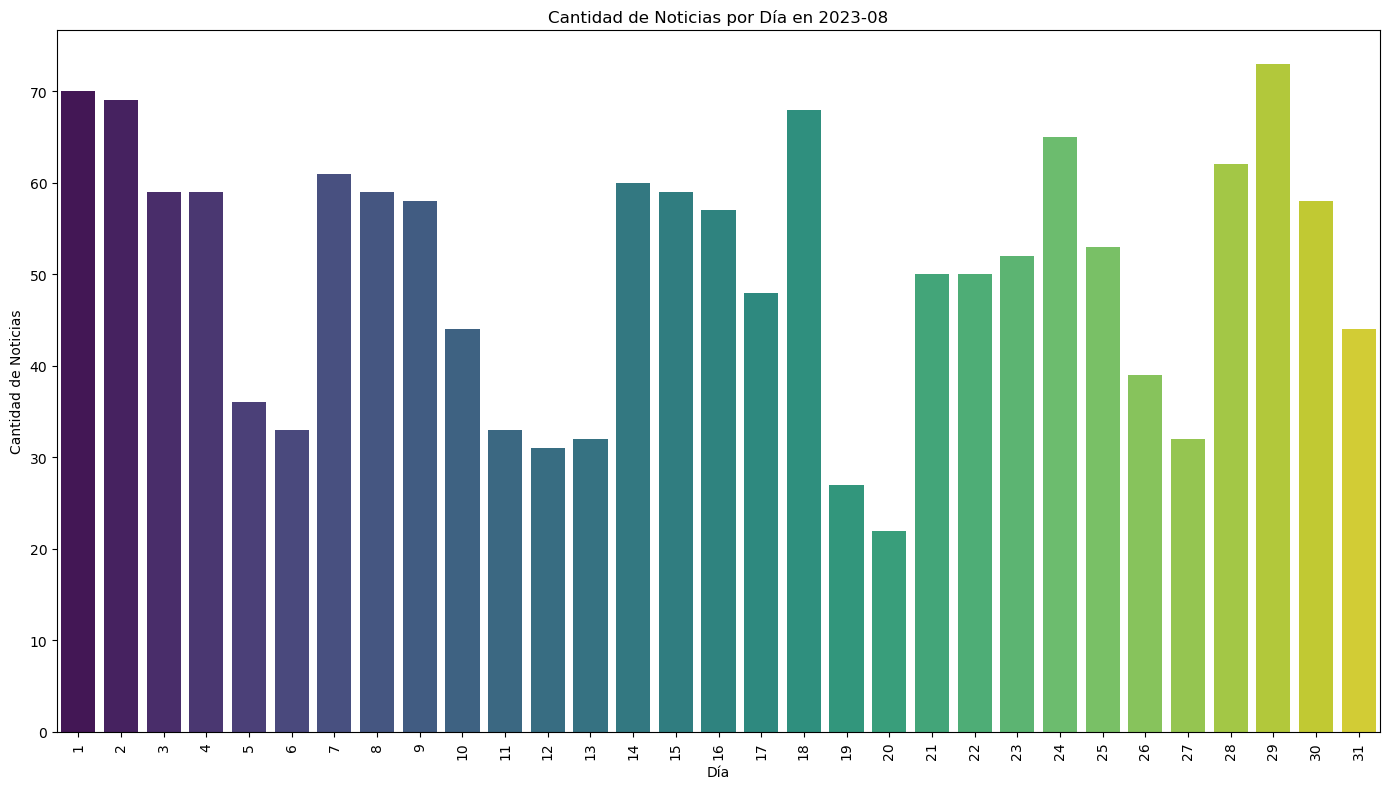

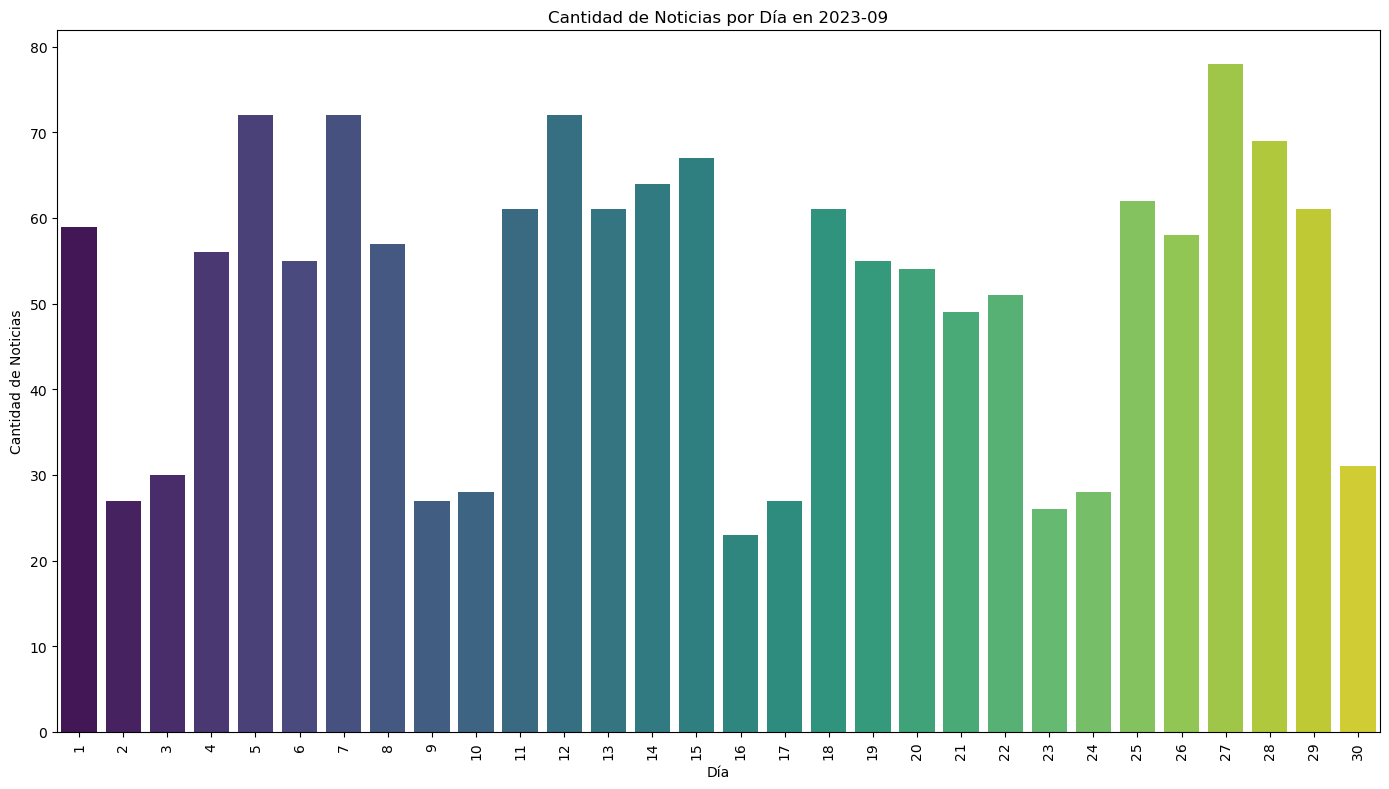

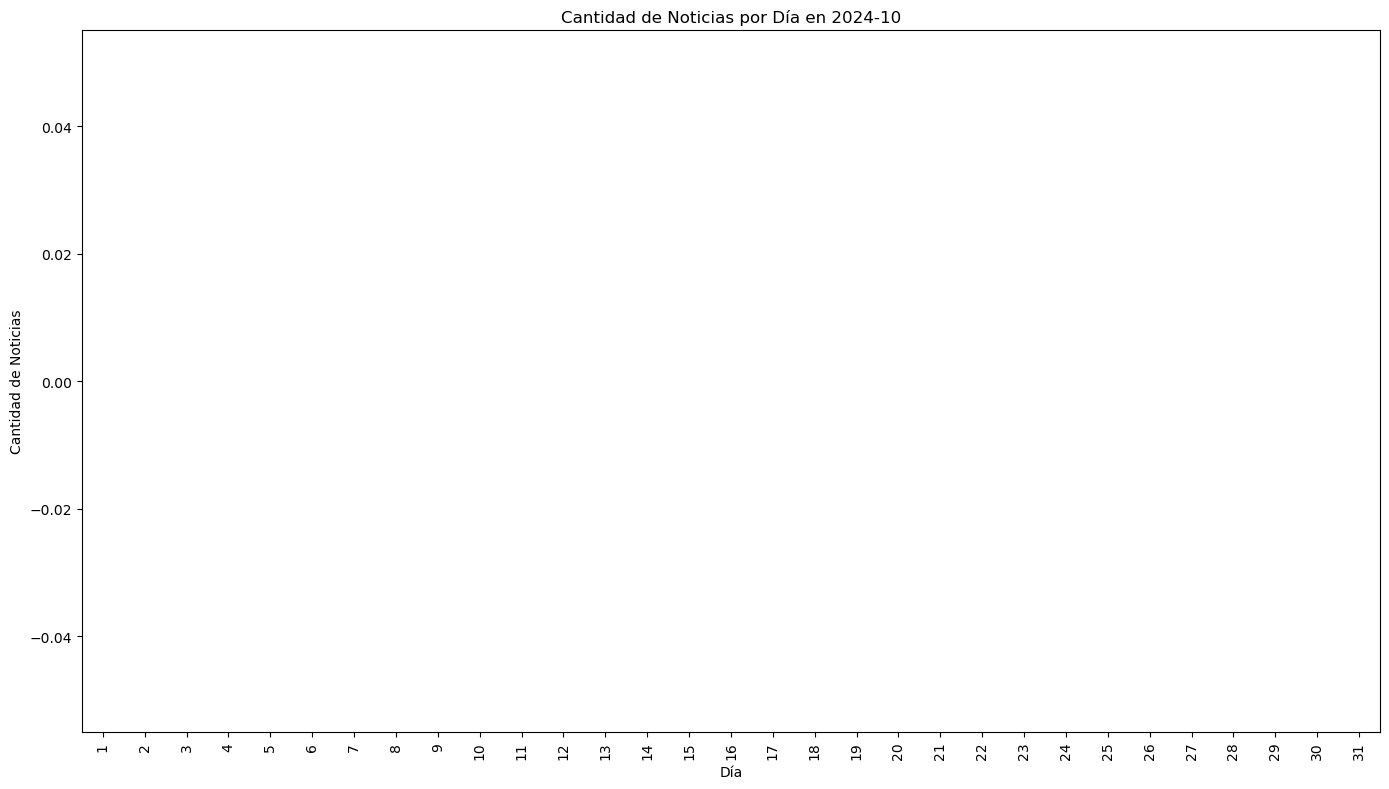

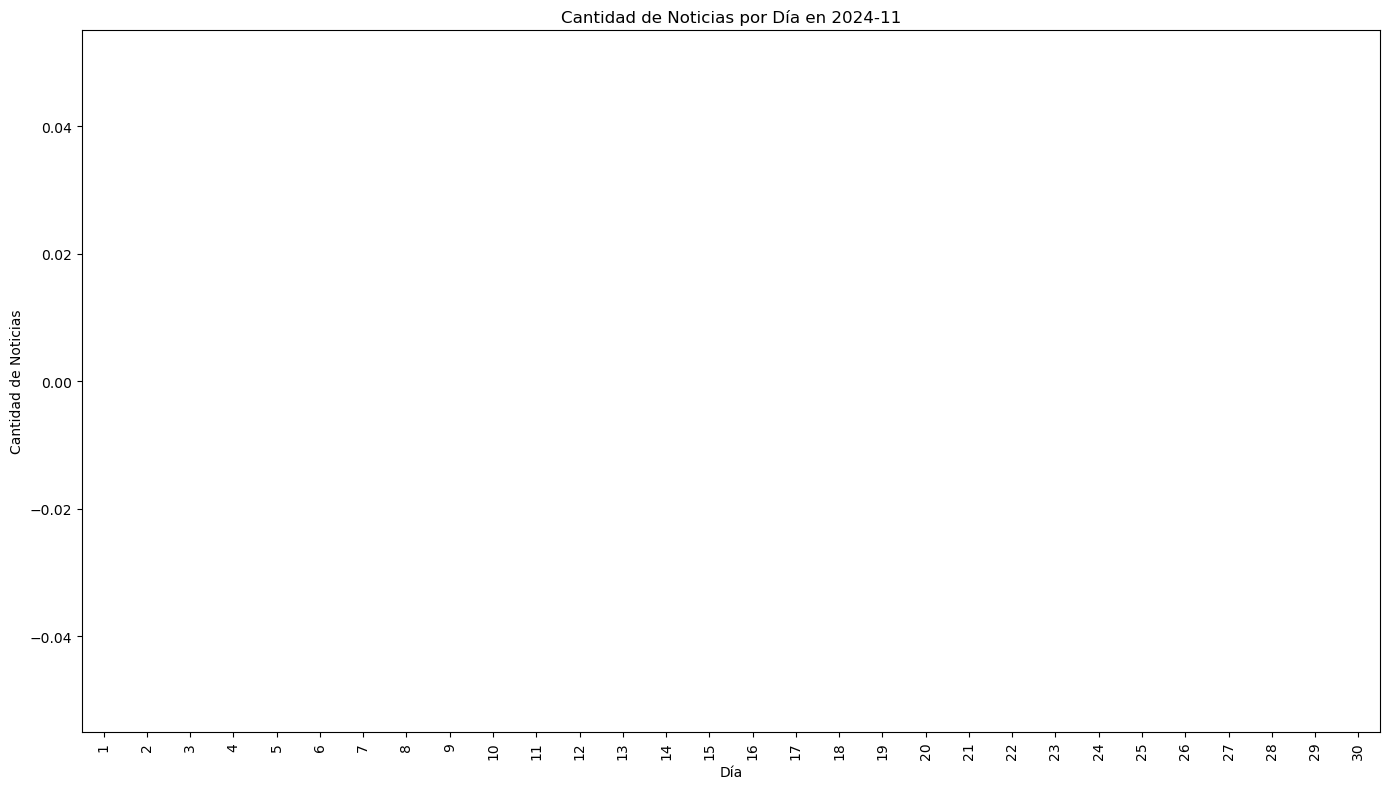

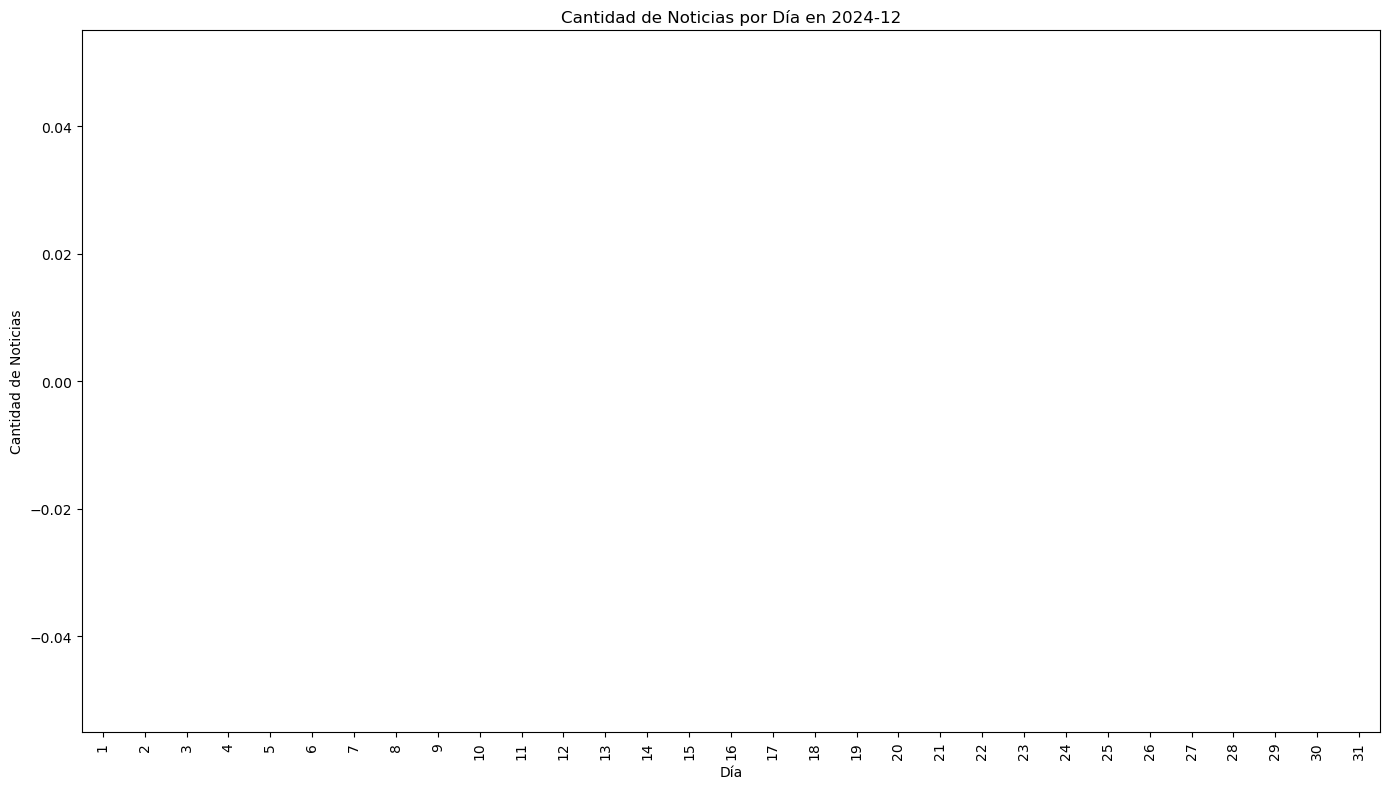

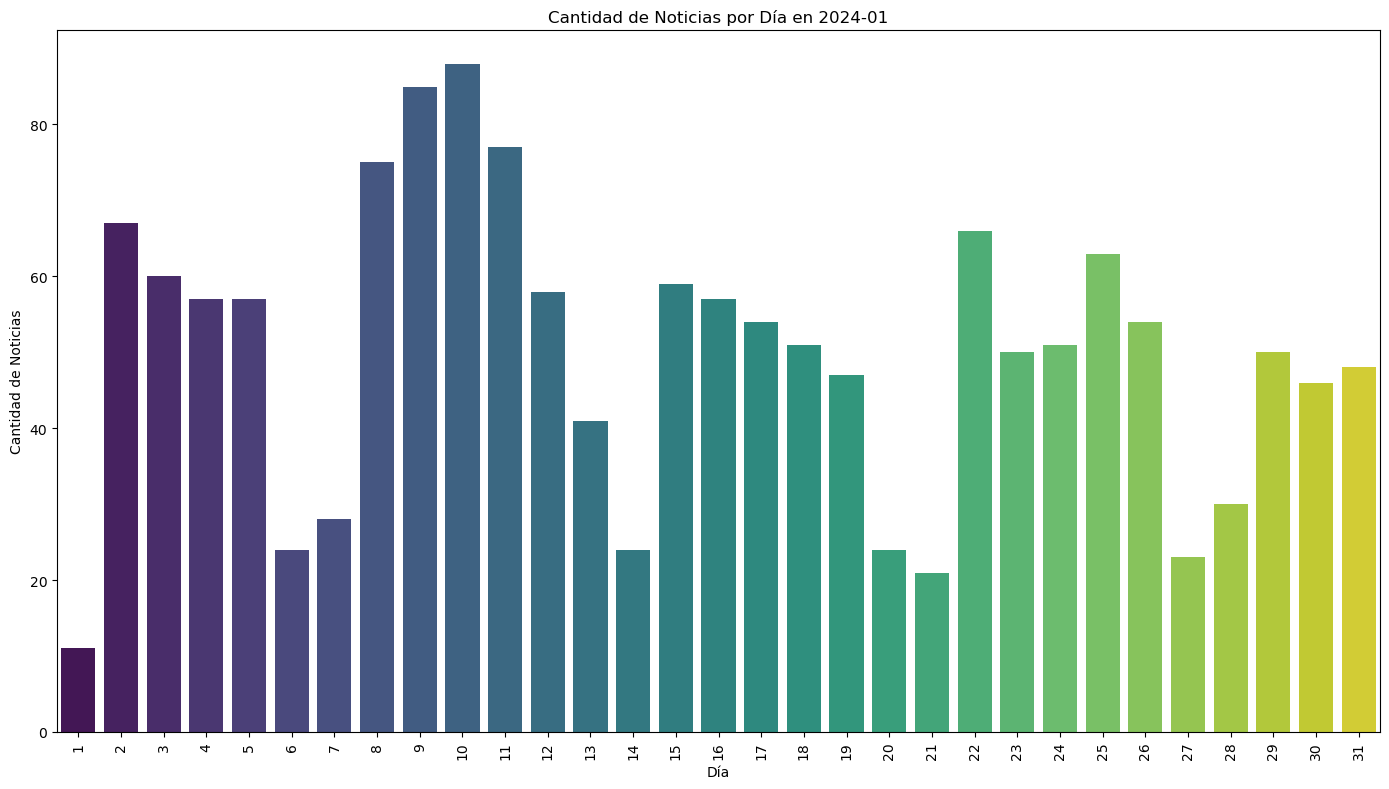

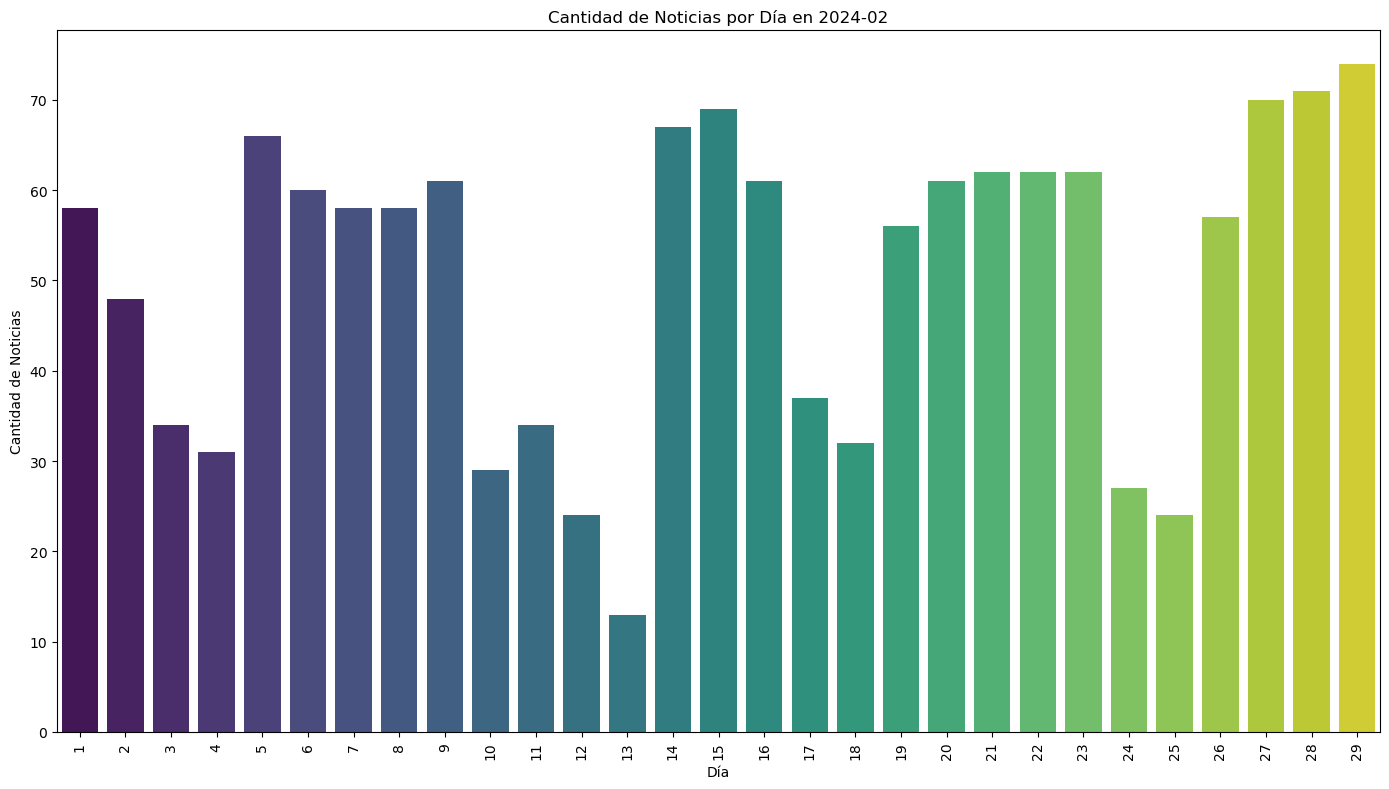

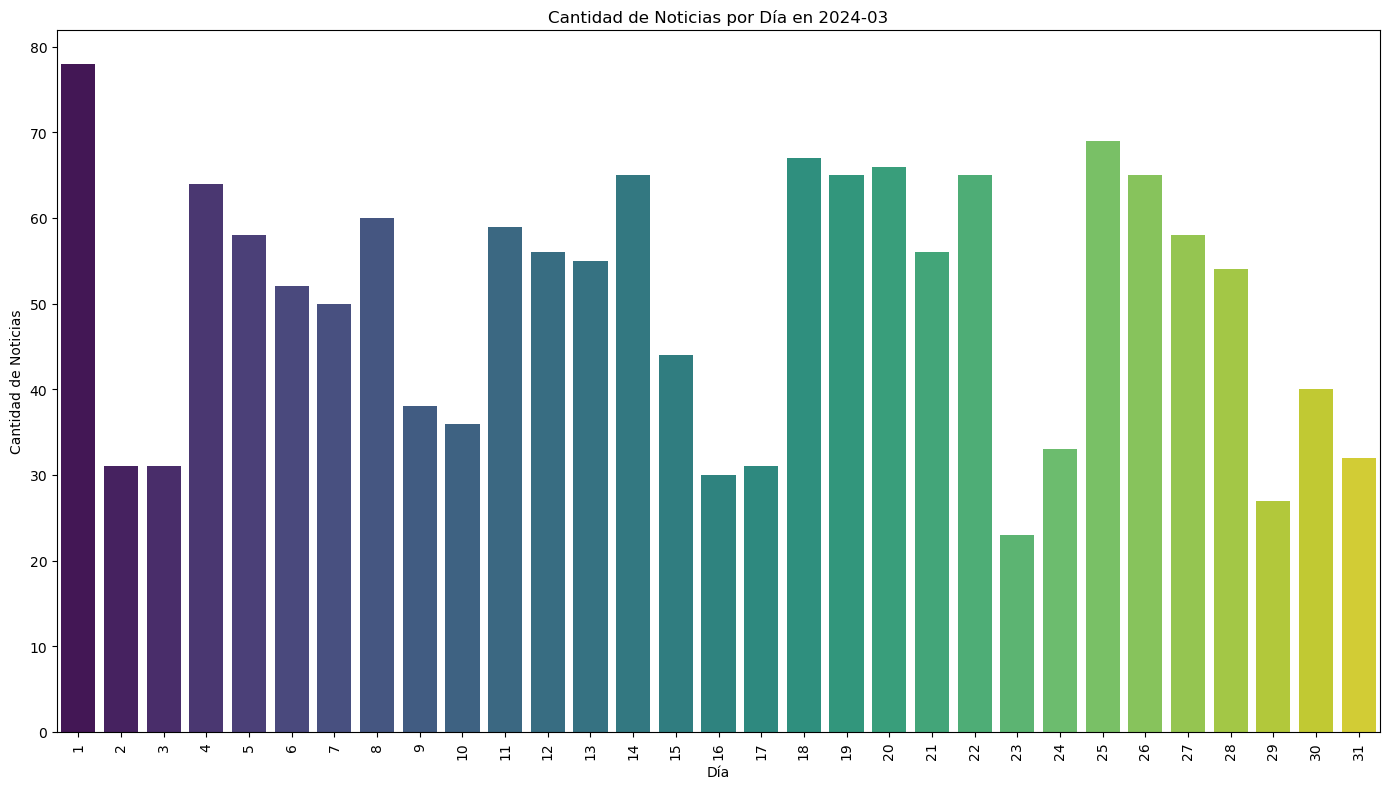

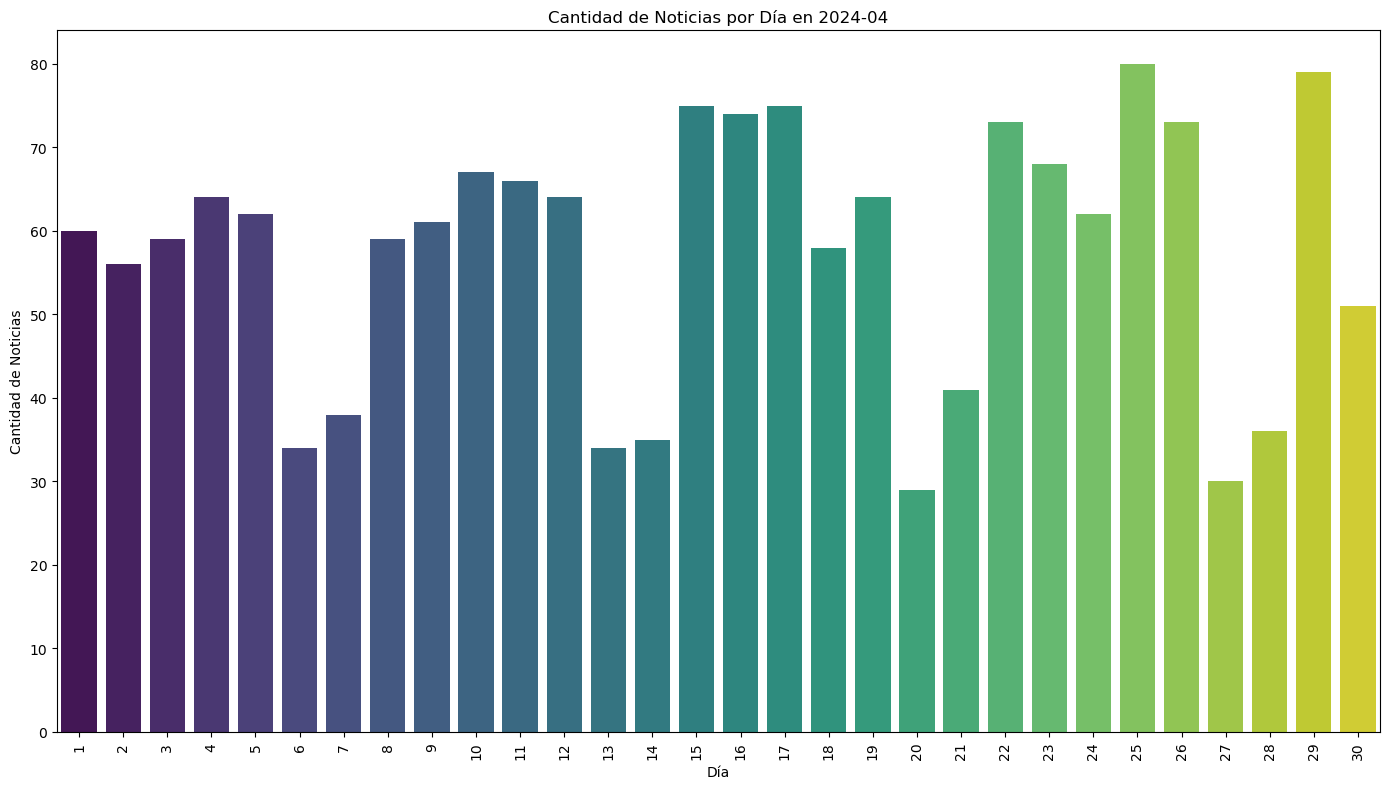

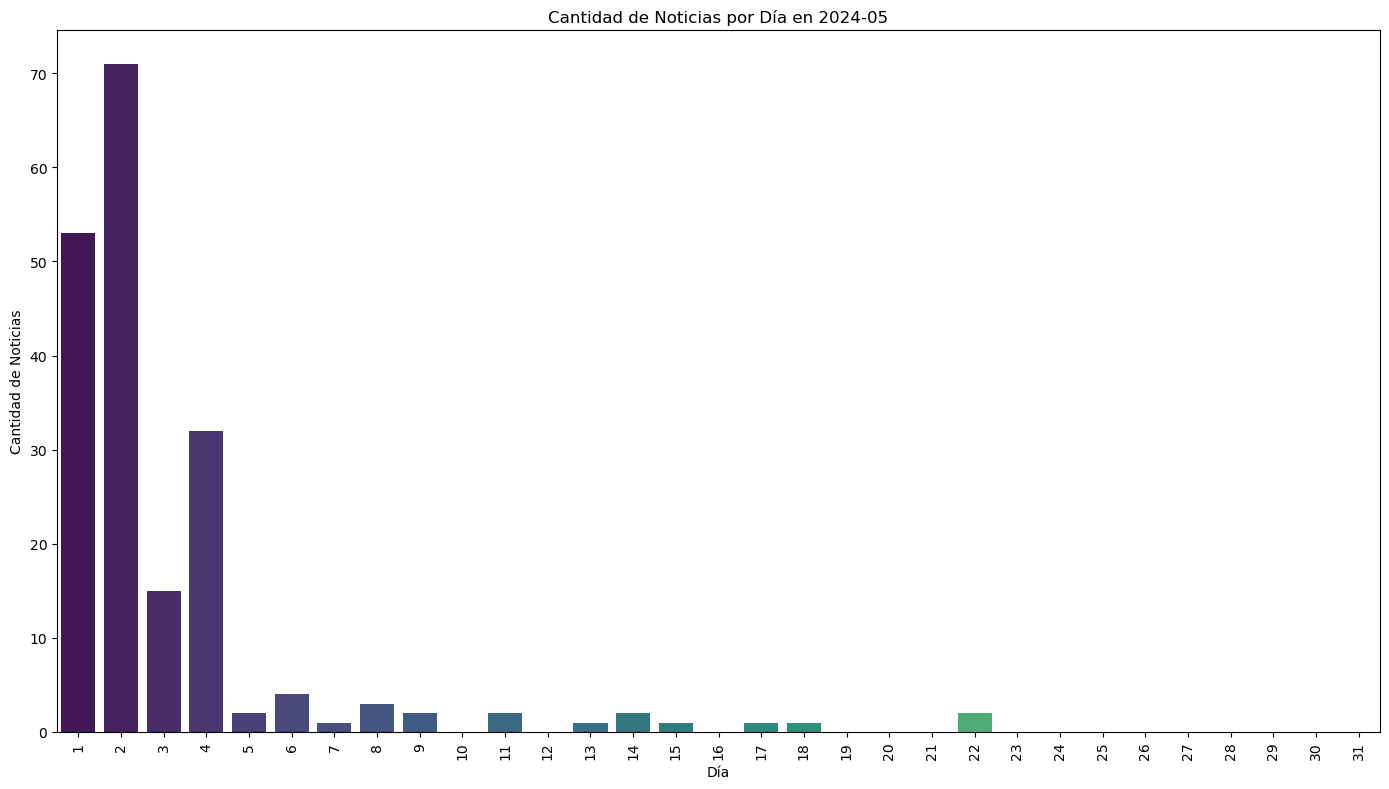

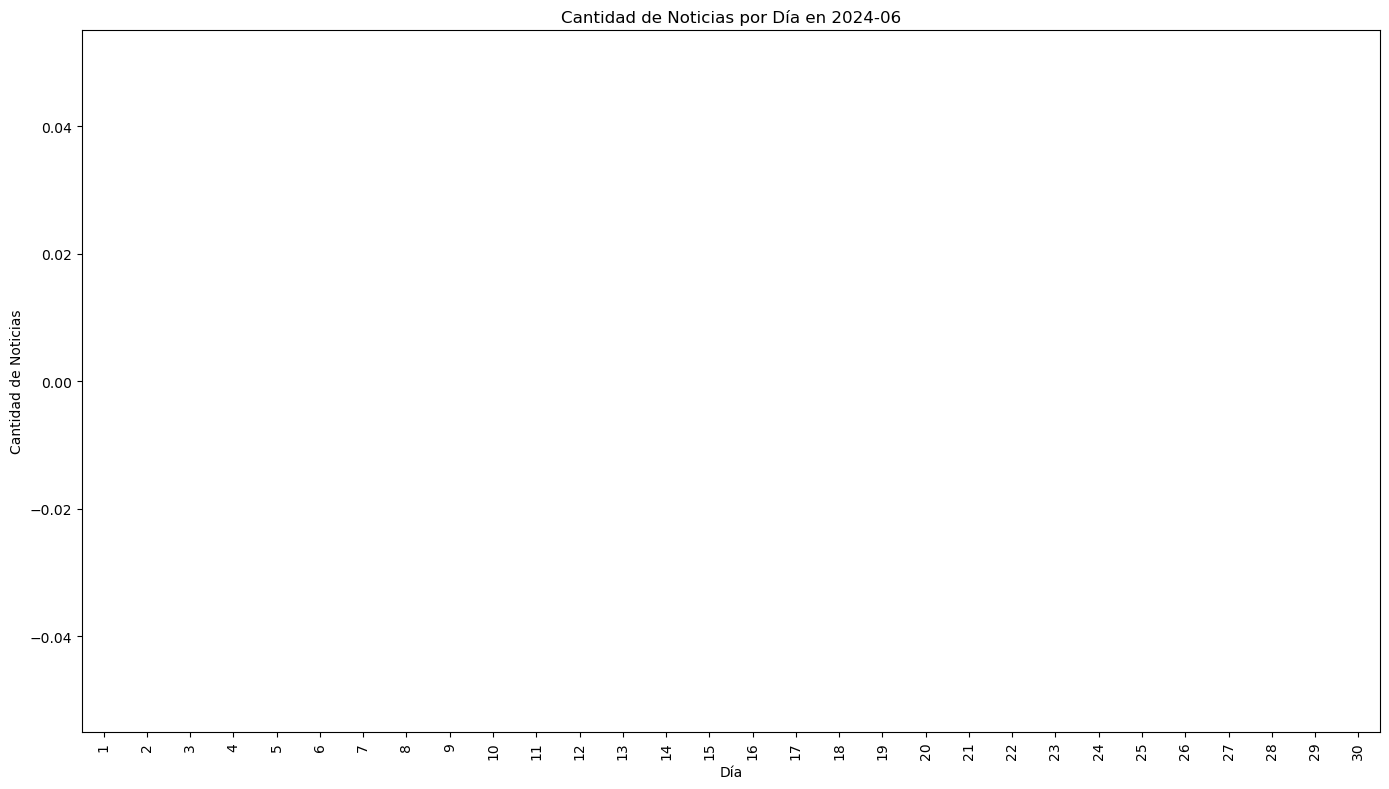

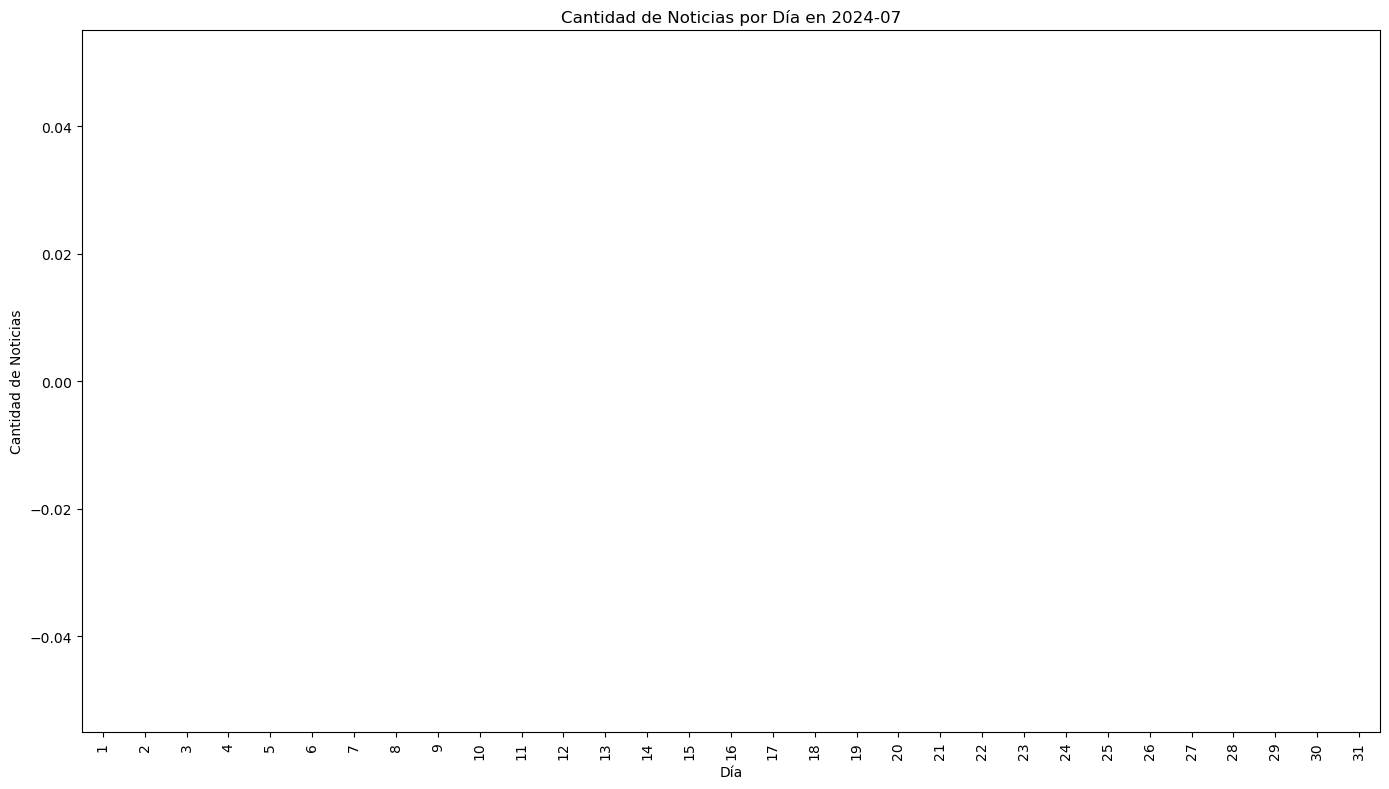

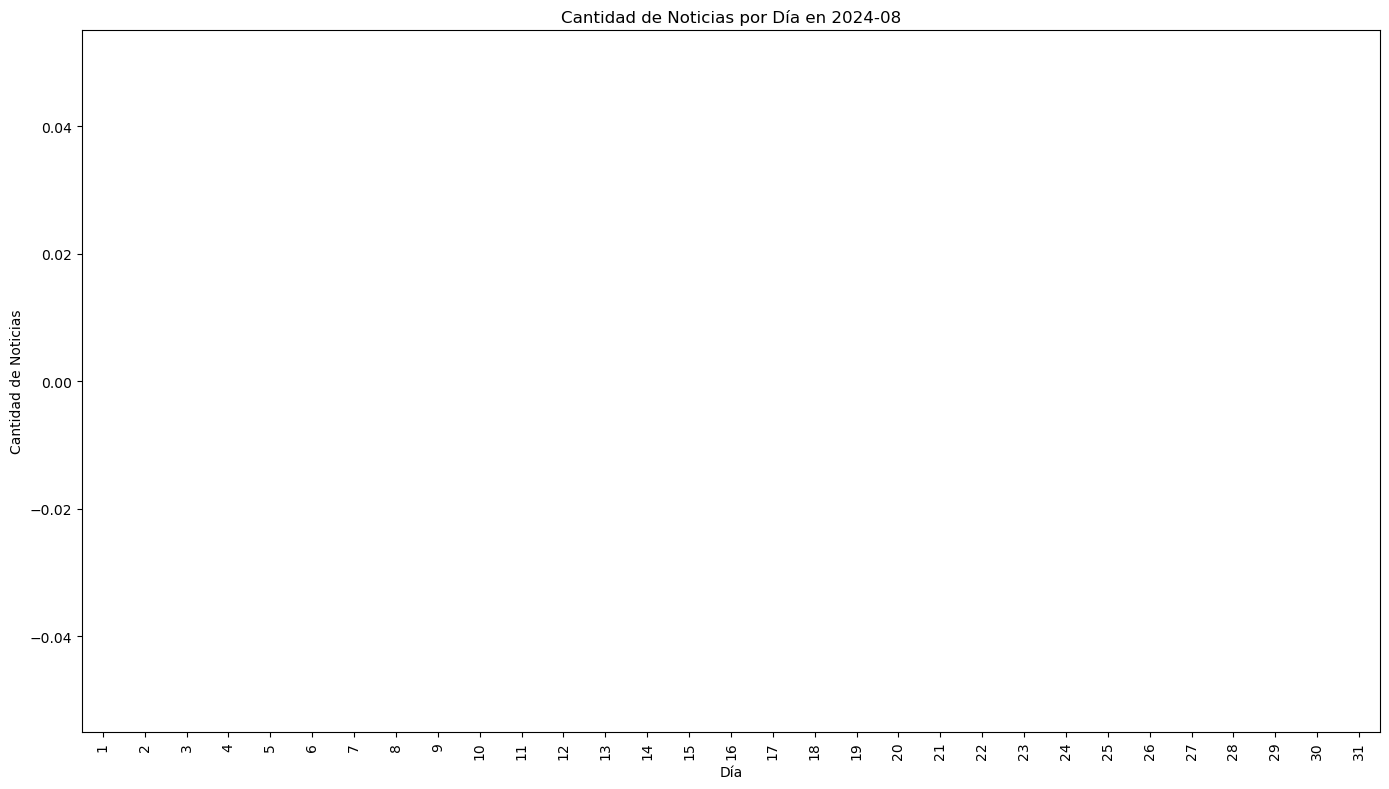

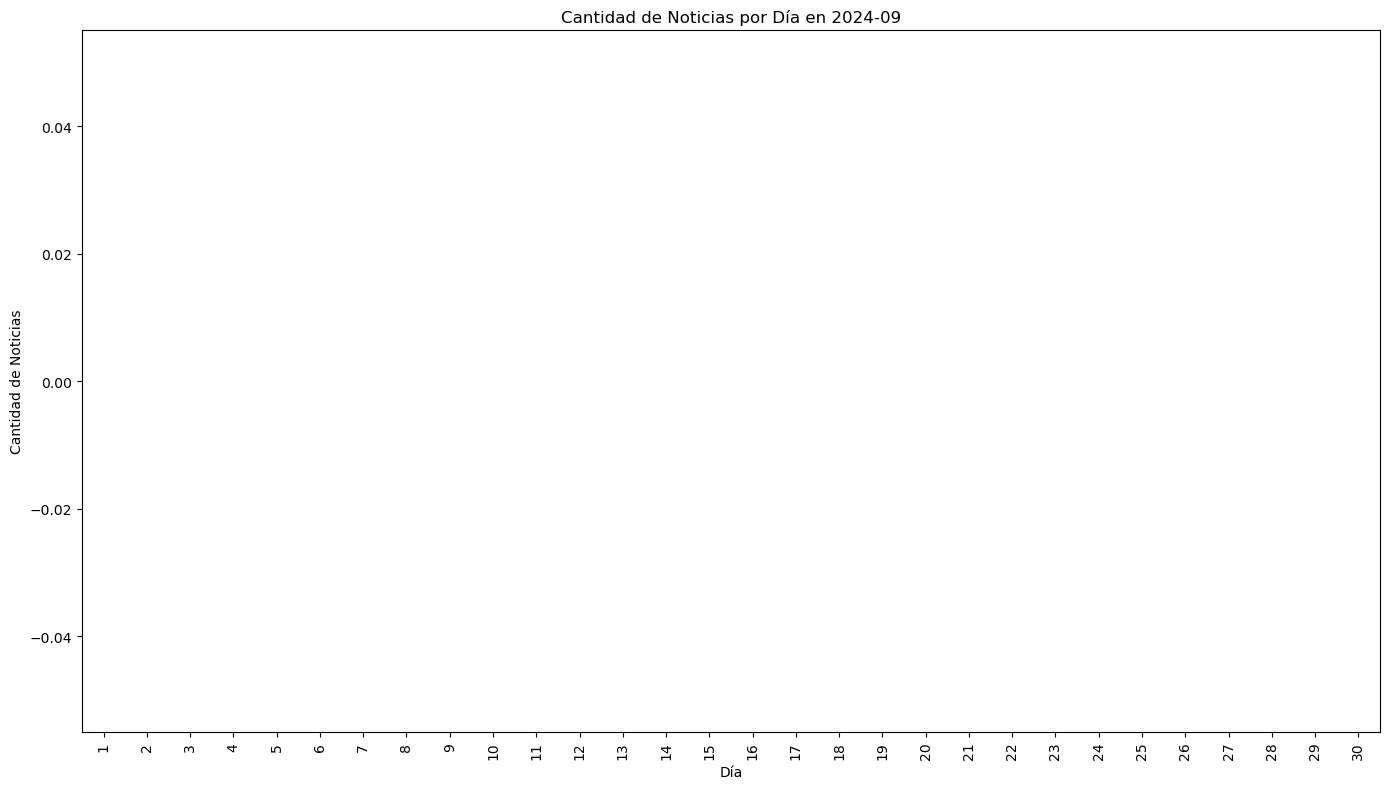

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from calendar import monthrange

# Leer el archivo CSV
conteo_por_dia = pd.read_csv('conteo_noticias_por_dia.csv')

# Asegurarse de que las columnas 'Año', 'Mes' y 'Día' son de tipo entero
conteo_por_dia['Año'] = conteo_por_dia['Año'].astype(int)
conteo_por_dia['Mes'] = conteo_por_dia['Mes'].astype(int)
conteo_por_dia['Día'] = conteo_por_dia['Día'].astype(int)

def generar_todos_los_dias(año, mes):
    dias_en_mes = monthrange(año, mes)[1]
    return pd.DataFrame({'Año': [año] * dias_en_mes, 'Mes': [mes] * dias_en_mes, 'Día': range(1, dias_en_mes + 1)})

# Crear un gráfico por cada año
for año in conteo_por_dia['Año'].unique():
    datos_año = conteo_por_dia[conteo_por_dia['Año'] == año]

    todos_los_dias = pd.concat([generar_todos_los_dias(año, mes) for mes in range(1, 13)])

    datos_año = pd.merge(todos_los_dias, datos_año, on=['Año', 'Mes', 'Día'], how='left')
    
    datos_año['Cantidad_Noticias'] = datos_año['Cantidad_Noticias'].fillna(0)
    
    if not datos_año.empty:
        plt.figure(figsize=(14, 8))
        sns.barplot(data=datos_año, x='Día', y='Cantidad_Noticias', hue='Mes', palette='viridis')
        plt.title(f'Cantidad de Noticias por Día en el Año {año}')
        plt.xlabel('Día del Año')
        plt.ylabel('Cantidad de Noticias')
        plt.legend(title='Mes')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Crear gráficos por mes
for año in conteo_por_dia['Año'].unique():
    for mes in conteo_por_dia['Mes'].unique():
 
        todos_los_dias = generar_todos_los_dias(año, mes)

        datos_mes = pd.merge(todos_los_dias, conteo_por_dia, on=['Año', 'Mes', 'Día'], how='left')

        datos_mes['Cantidad_Noticias'] = datos_mes['Cantidad_Noticias'].fillna(0)
        
        if not datos_mes.empty:
            plt.figure(figsize=(14, 8))
            sns.barplot(data=datos_mes, x='Día', y='Cantidad_Noticias', palette='viridis')
            plt.title(f'Cantidad de Noticias por Día en {año}-{mes:02d}')
            plt.xlabel('Día')
            plt.ylabel('Cantidad de Noticias')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()
